<h1><center> Quantitative Finance Bootcamp - Erdos Institute <center></h1>
<h1><center> Mini project 2: Are financial stock returns normally distributed? </center></h1>


A common assumption made in the theory of financial mathematics is the daily log-returns of a stock path follow a normal distribution. Since, the sum of independent normal distributions is normal again, the total returns should also follow a normal distribution. 

This mini-project will perform some graphical and standard statistical tests to check if the stock returns are normally distributed. 

### 1. Graphical tests

These visual diagnostic tests offers a concise yet informative first step before applying more formal normality tests. However, they come with a few drawbacks including reliance on analysts subjective interpretation and they do not provide quantifiable measures to evaluate the degree of non-normality in our data.
    
- **Quantile-Quantile(Q-Q) plot**: With a Q-Q plot, the observed data's quantiles are plotted against the theoretical quantiles (normal distribution in our case). If the data closely follows the theoretical distribution, the points on the Q-Q plot will lie on a diagonal line. Deviations from this line indicate departures from the expected distribution.
    
- **Box plot**: A symmetric box plot with a median line near the center and relatively equal-length whiskers suggests potential normality. However, significant skewness, outliers, or unequal whisker lengths can indicate deviations from a normal distribution. 

### 2. Statistical tests
There are several standard statistical tests whose null hypothesis is "The data is normally distributed." Meaning, if the statistical test as low p-value, then we have statistical evidence the data is **not** normally distributed. In this project, we will use Shapiro-Wilk test for normality test. 



# Exploration 1: Testing the evidence of normal distribution for JPMorgan Chase & Co 

First, we will pick a stock of our interest. For this first test, we will choose JPMorgan Chase & Co (JPM).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import yfinance as yf 
import datetime as dt

# Setting global matplotlib parameters
import matplotlib as mpl
import matplotlib.dates as mdates 
mpl.rcParams["xtick.labelsize"] = 22
mpl.rcParams["ytick.labelsize"] = 22
mpl.rcParams['axes.titlesize'] = 22 
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams["mathtext.fontset"] = 'cm'


### Download the data for JPMorgan Chase & Co for the past 10 years

In [2]:
EndDate = dt.datetime.today()
StartDate = EndDate - pd.DateOffset(years=10)

JPMStockData = yf.download('JPM', start = StartDate, end = EndDate)["Close"]
JPMStockReturns = JPMStockData/JPMStockData.shift(1)
JPMStockLogReturns = np.log(JPMStockReturns.dropna())['JPM'].values
Dates = JPMStockReturns.dropna().index

/var/folders/nn/r9r3k78j2q12py3xmz4vtgzc0000gn/T/ipykernel_45609/291617146.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  JPMStockData = yf.download('JPM', start = StartDate, end = EndDate)["Close"]
[*********************100%***********************]  1 of 1 completed


### Q-Q  and box plot - log returns of JPM

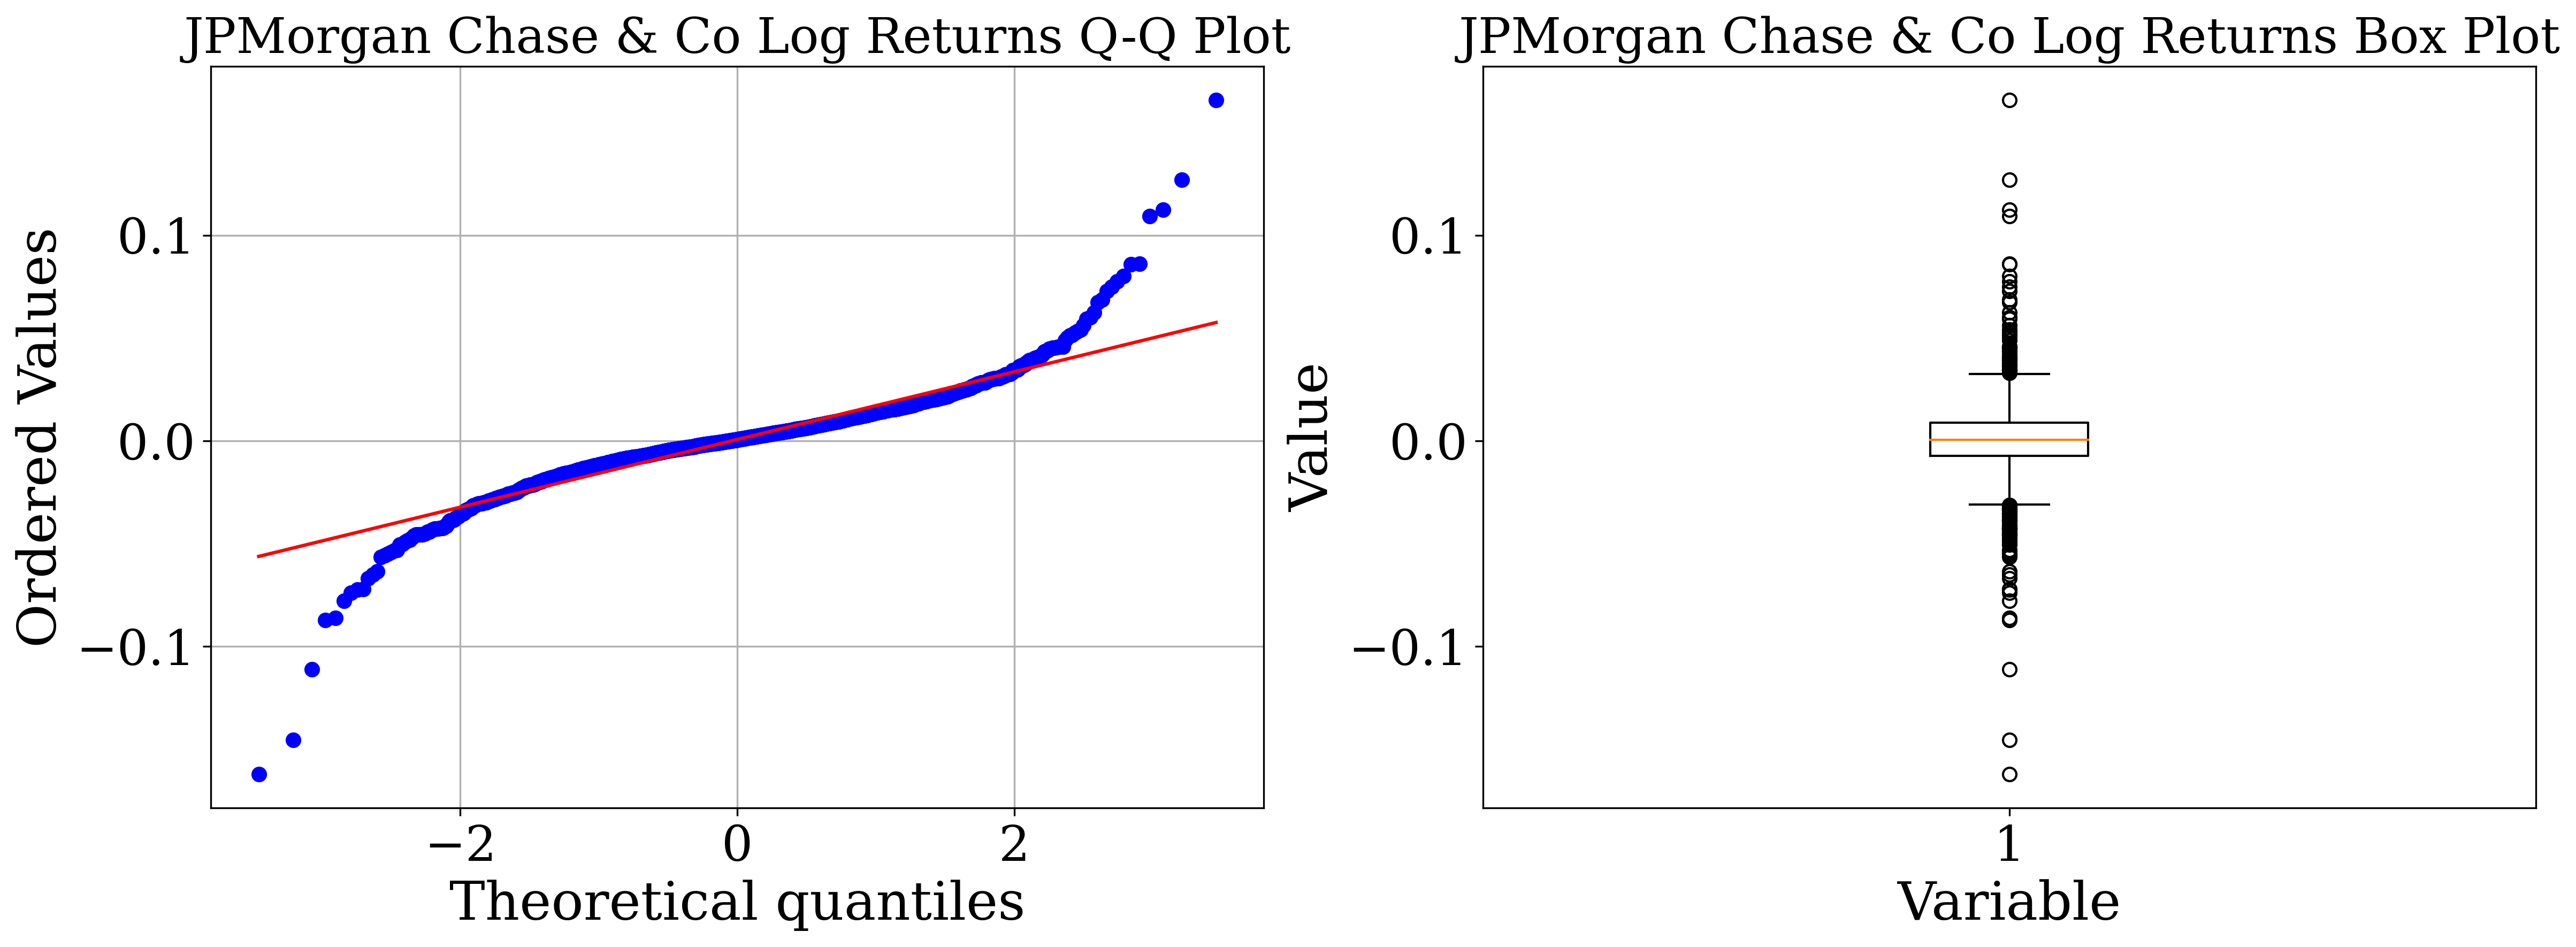

In [3]:
fig, axes = plt.subplots(1,2,figsize=(16, 6),dpi=300)

stats.probplot(JPMStockLogReturns, dist="norm", plot=axes[0])
axes[0].set_title("JPMorgan Chase & Co Log Returns Q-Q Plot")
axes[0].grid(True)
axes[1].boxplot(JPMStockLogReturns)
axes[1].set_xlabel("Variable")
axes[1].set_ylabel("Value")
axes[1].set_title("JPMorgan Chase & Co Log Returns Box Plot")
plt.tight_layout()
plt.show()

As we can witness, the log returns of JPMorgan Chase & Co stock display heavier tails. Let us perform a statistical test further. 

### Shapiro-Wilk test

In [4]:
pvalue = stats.shapiro(JPMStockLogReturns)[1]
print("Normality Test Results of JPMStockLogReturns stock (Shapiro-Wilk test):")
print(f"p-value = {pvalue}")
if pvalue < 0.05:
    print("Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("No statistically significant evidence against normality.")

Normality Test Results of JPMStockLogReturns stock (Shapiro-Wilk test):
p-value = 2.453415772115319e-39
Statistically significant evidence that the data is NOT normally distributed.


In conclusion, log returns of JPMorgan Chase & Co clearly deviates from normal distribution, and both our statistical and graphical tests confirms it. The culprit? Our 10-year data captures wild market swings from events like COVID and global conflicts, leading to extreme data points. This sparks an interesting question: could there be a calmer period, free from extreme market volatility, where JPM log returns actually align with a normal distribution? 

Let us first try to plot JPM stock data over the last 10 years.

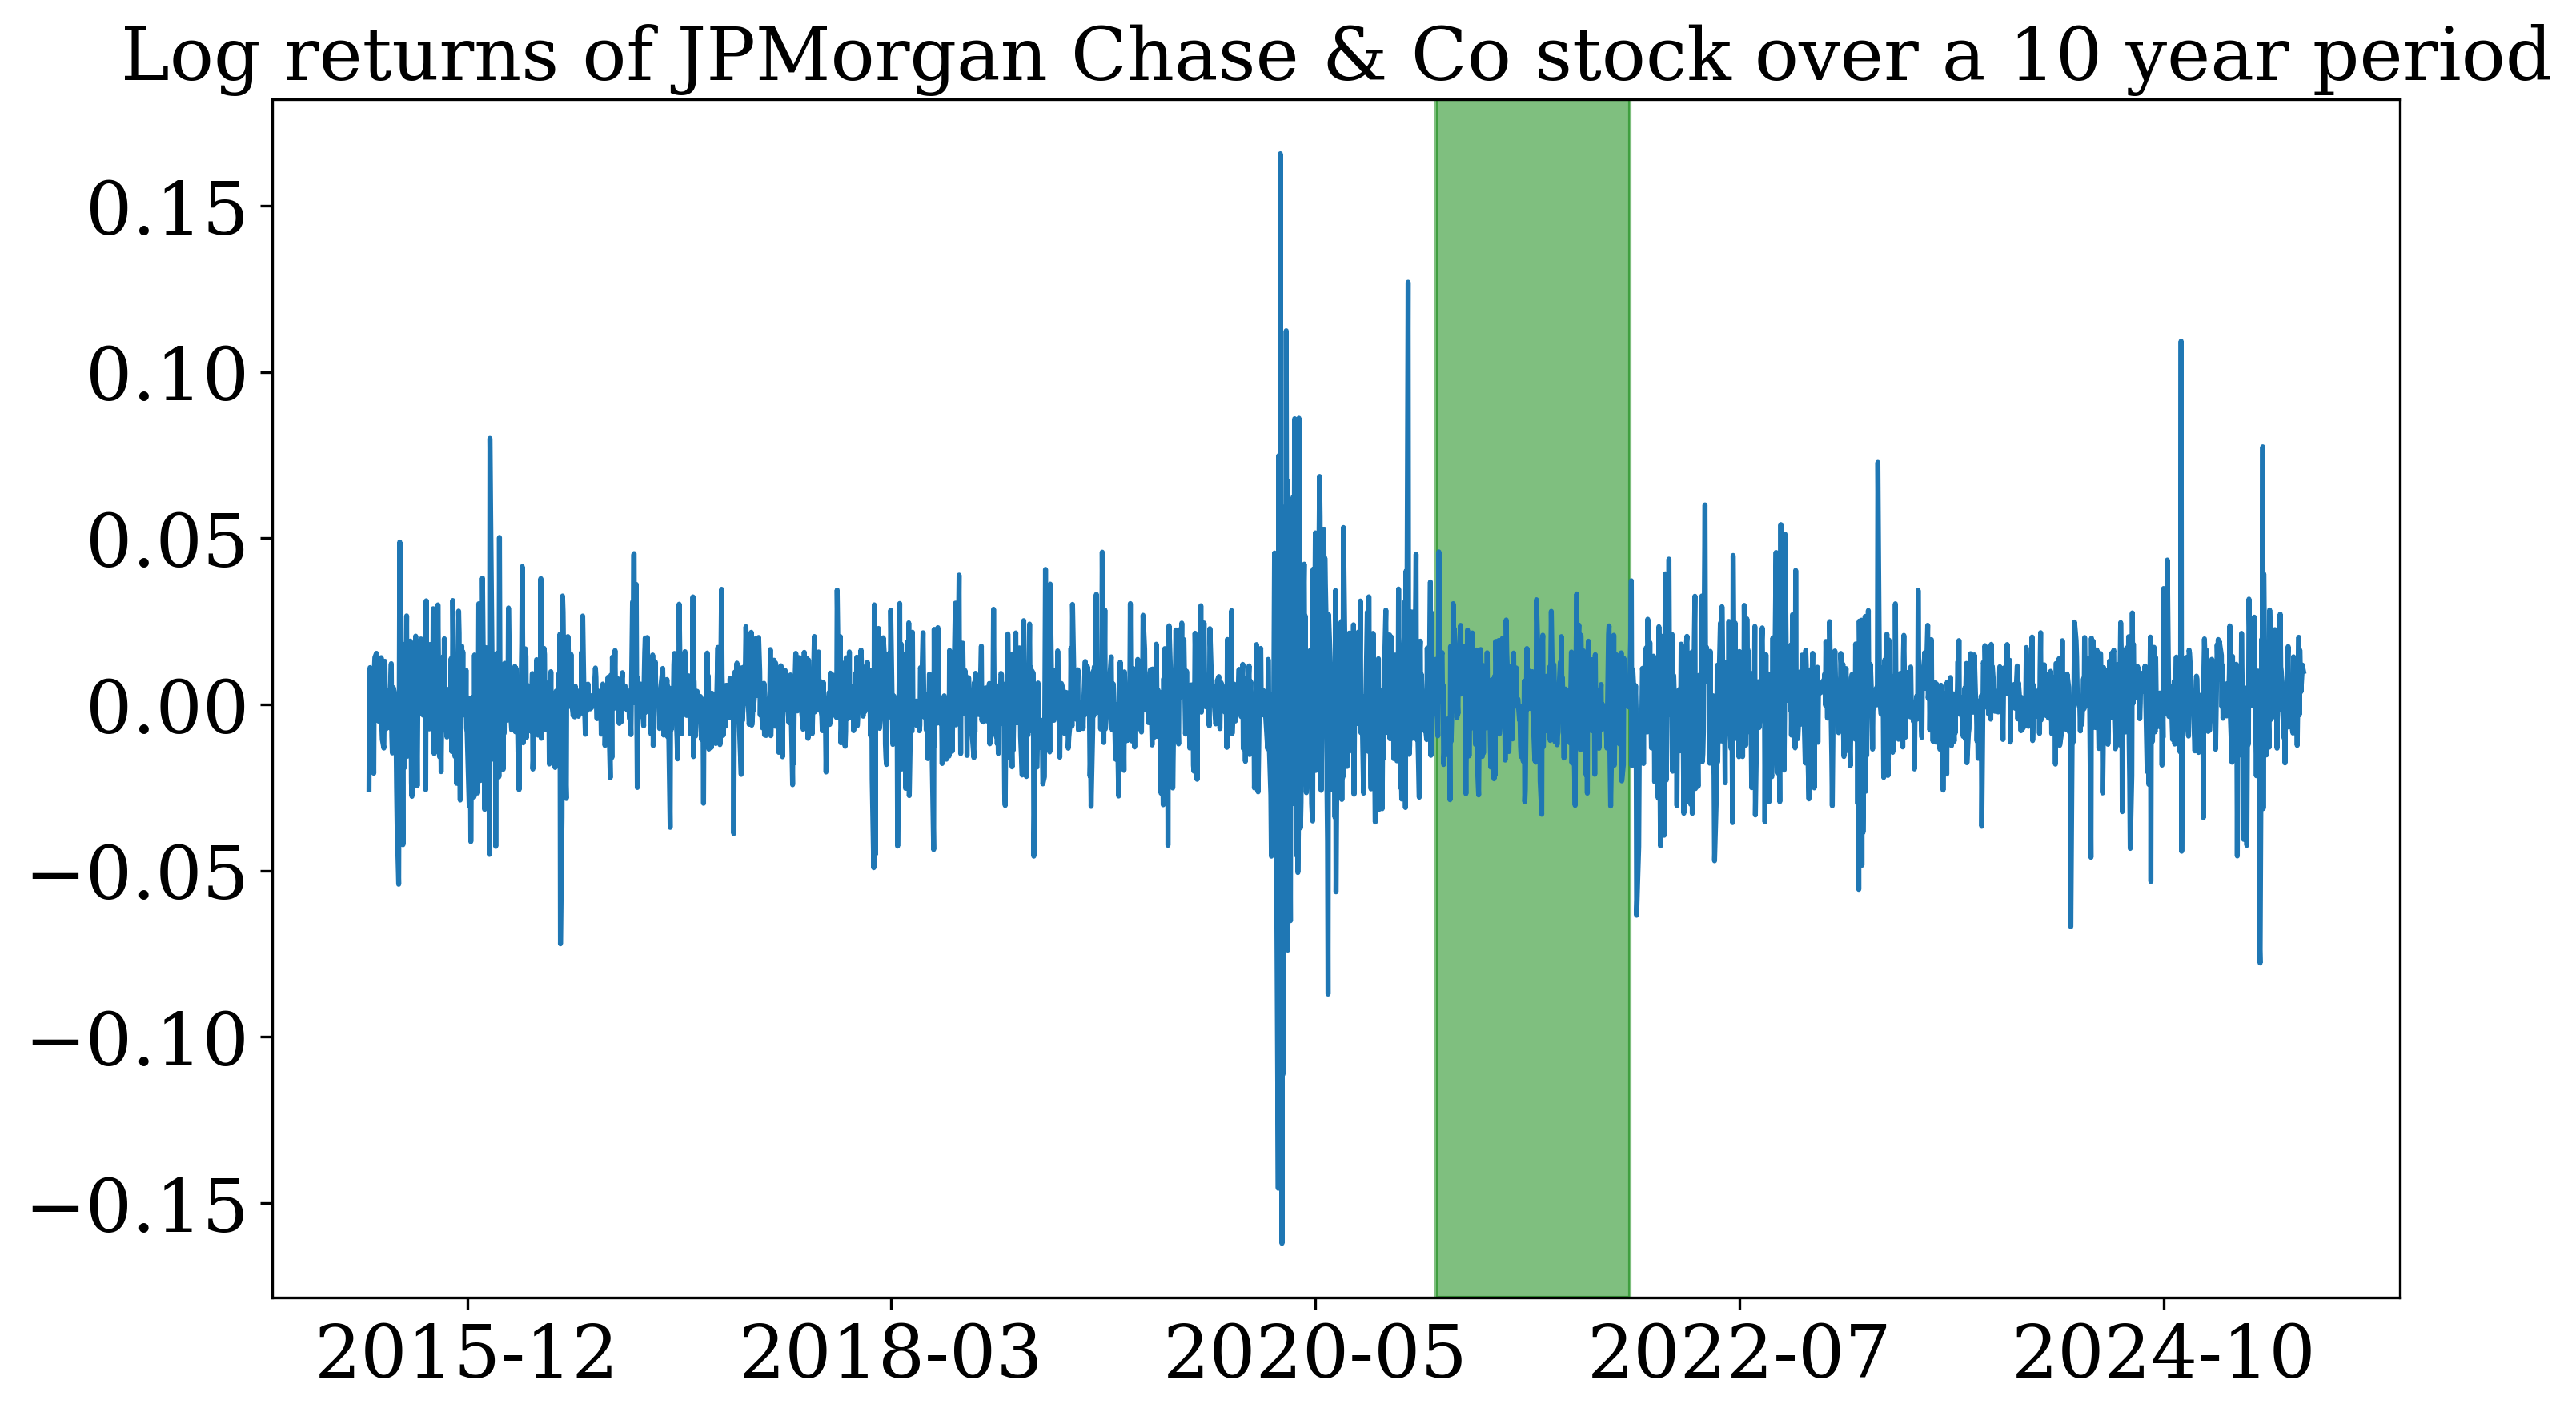

In [5]:
fig,ax = plt.subplots(figsize=(10,6),dpi=300)
ax.plot(Dates,JPMStockLogReturns)
plt.title("Log returns of JPMorgan Chase & Co stock over a 10 year period")
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
StartDate = dt.datetime(2021,1,1)
EndDate = dt.datetime(2022,1,1)
ax.axvspan(StartDate, EndDate, alpha=0.5, color='green')
plt.tight_layout()
plt.show()

Clearly, the COVID events of 2020 and the recent global conflicts spiked JPM's log returns with heavy-hitting outliers. However, the data highlighted in green during the year of 2021 suggests a quieter stretch relatively. Let's dig in and test if the returns followed a normal distribution during this calmer window.

### Download the data for JPMorgan Chase & Co during the highlighted area (2021)

In [6]:
JPMStockDataCustom = yf.download('JPM', start = StartDate, end = EndDate)["Close"]
JPMStockReturnsCustom = JPMStockDataCustom/JPMStockDataCustom.shift(1)
JPMStockLogReturnsCustom = np.log(JPMStockReturnsCustom.dropna())['JPM'].values
DatesCustom = JPMStockReturnsCustom.dropna().index

/var/folders/nn/r9r3k78j2q12py3xmz4vtgzc0000gn/T/ipykernel_45609/372773196.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  JPMStockDataCustom = yf.download('JPM', start = StartDate, end = EndDate)["Close"]
[*********************100%***********************]  1 of 1 completed


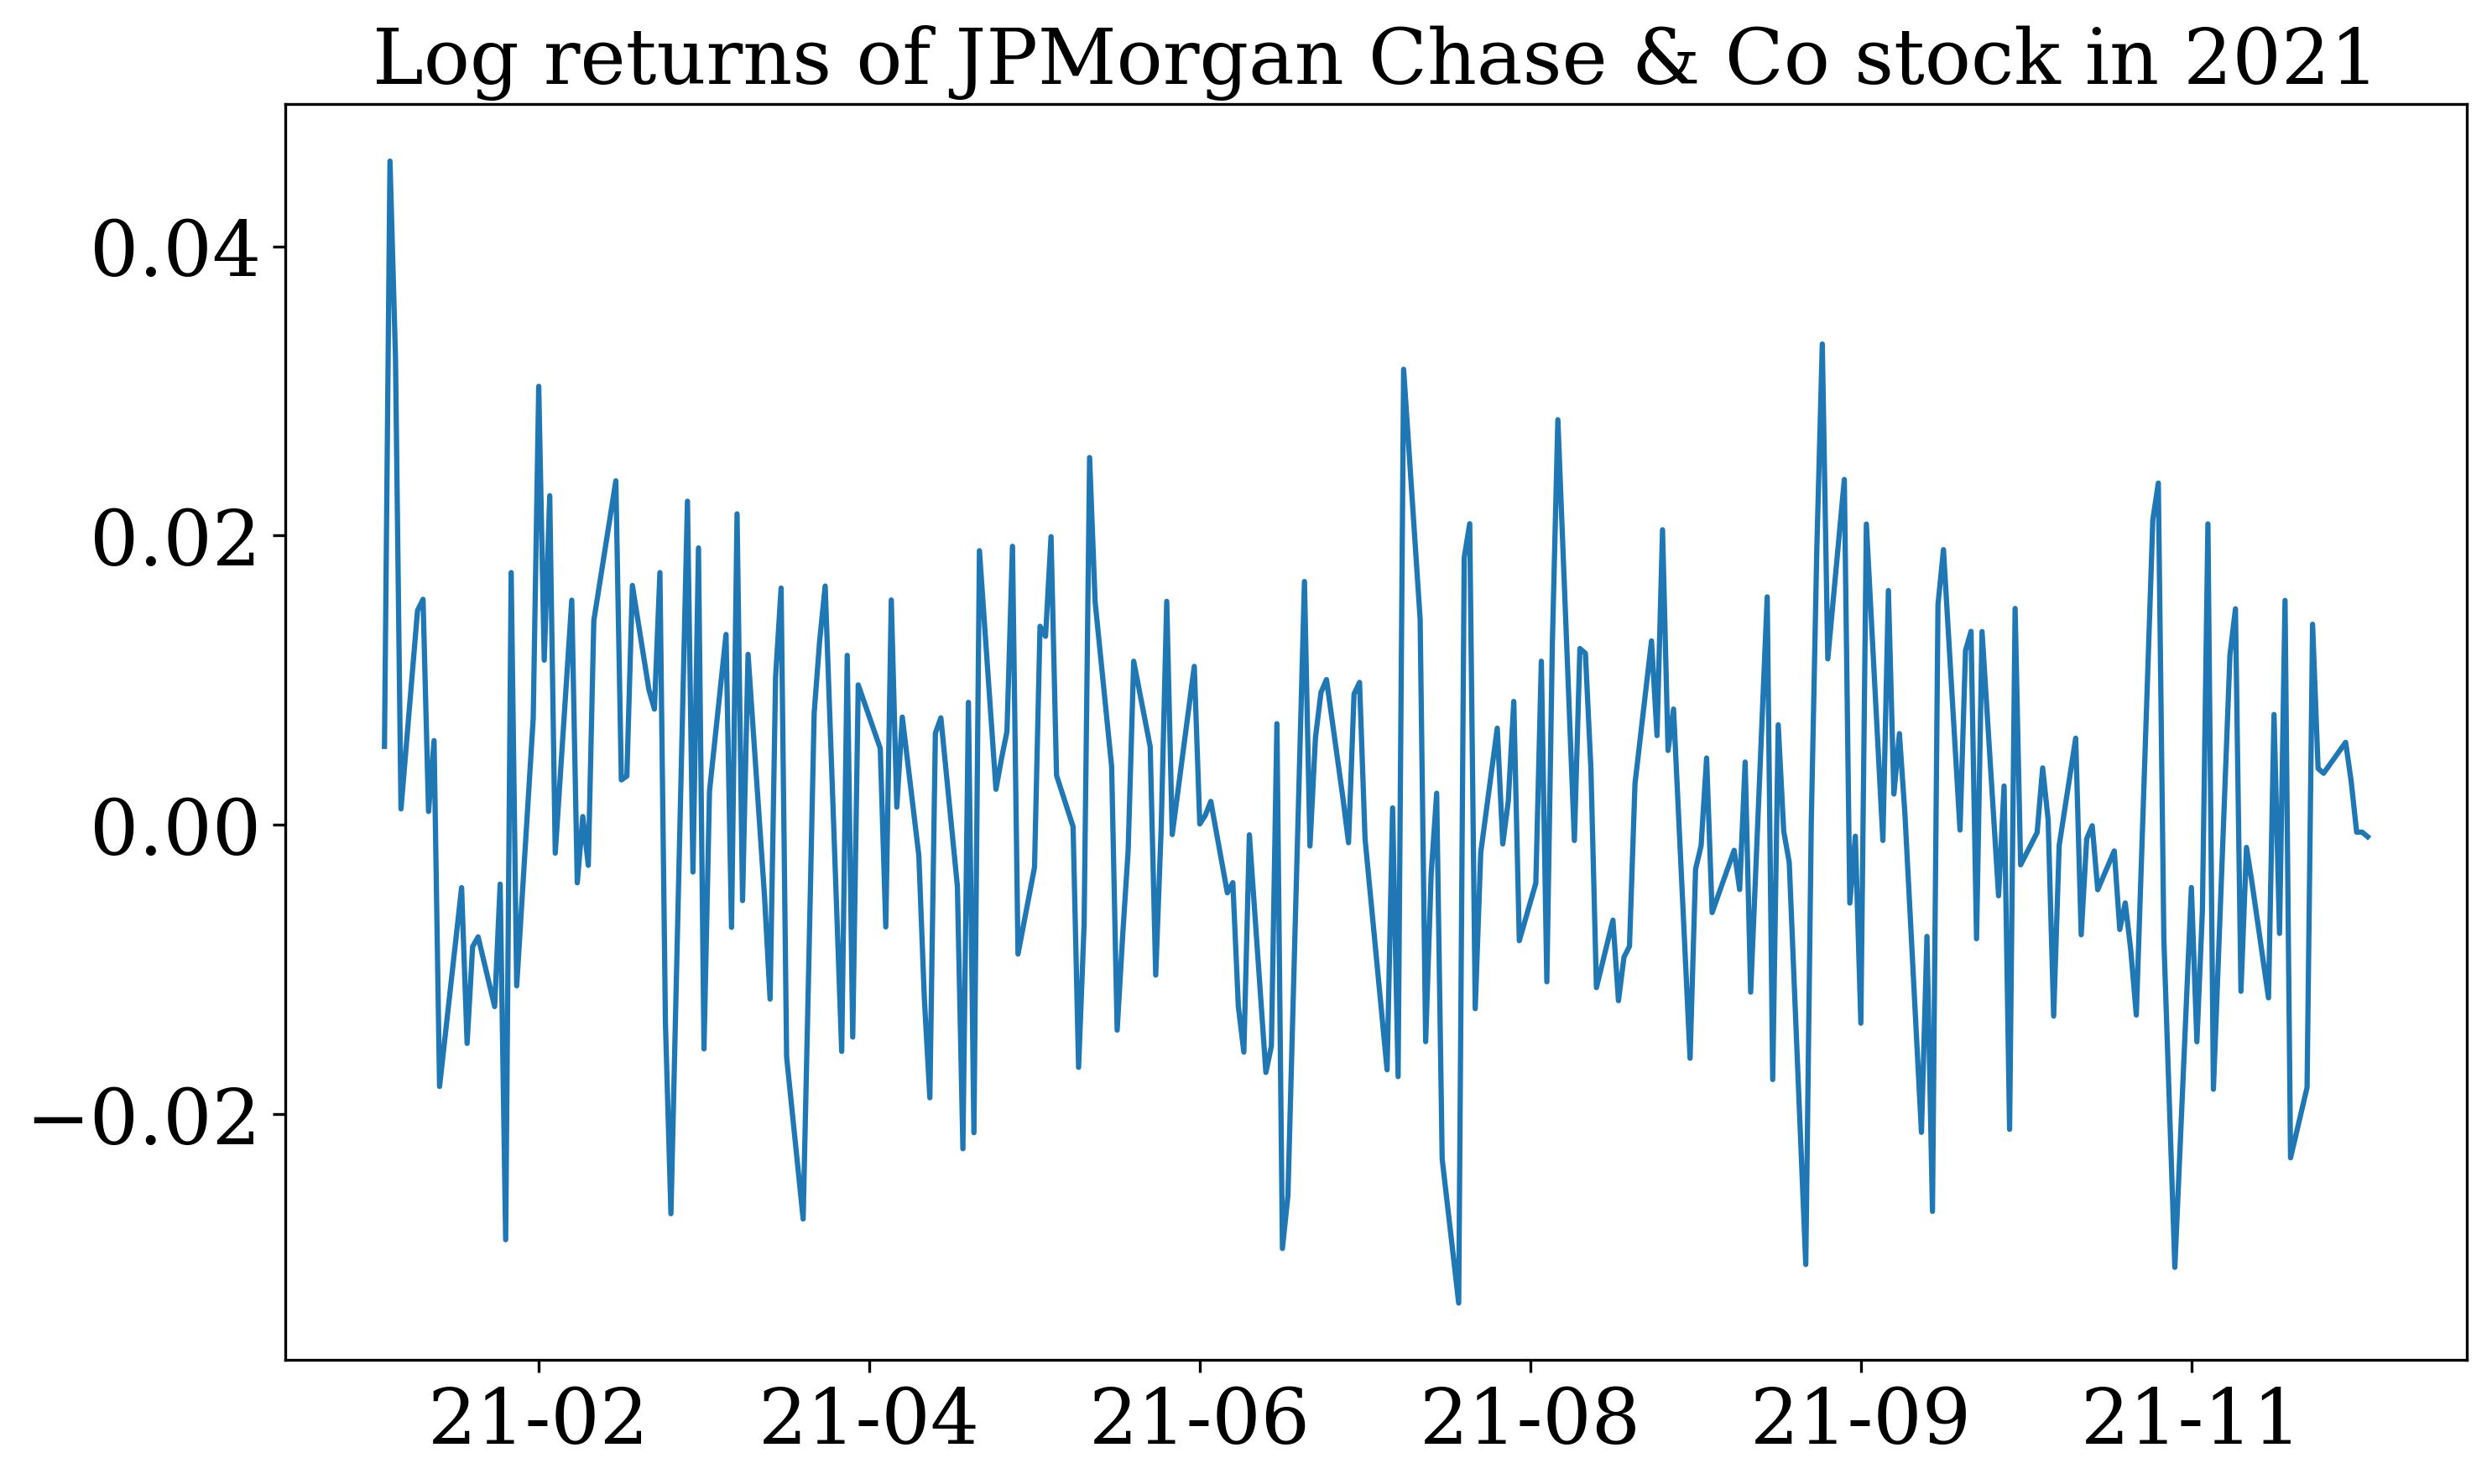

In [7]:
fig,ax = plt.subplots(figsize=(10,6),dpi=300)
ax.plot(DatesCustom,JPMStockLogReturnsCustom)
ax.xaxis.set_major_locator(plt.MaxNLocator(7)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.title("Log returns of JPMorgan Chase & Co stock in 2021")
plt.tight_layout()
plt.show()

### Shapiro-Wilk test - Log returns of JPMorgan Chase & Co (2021)

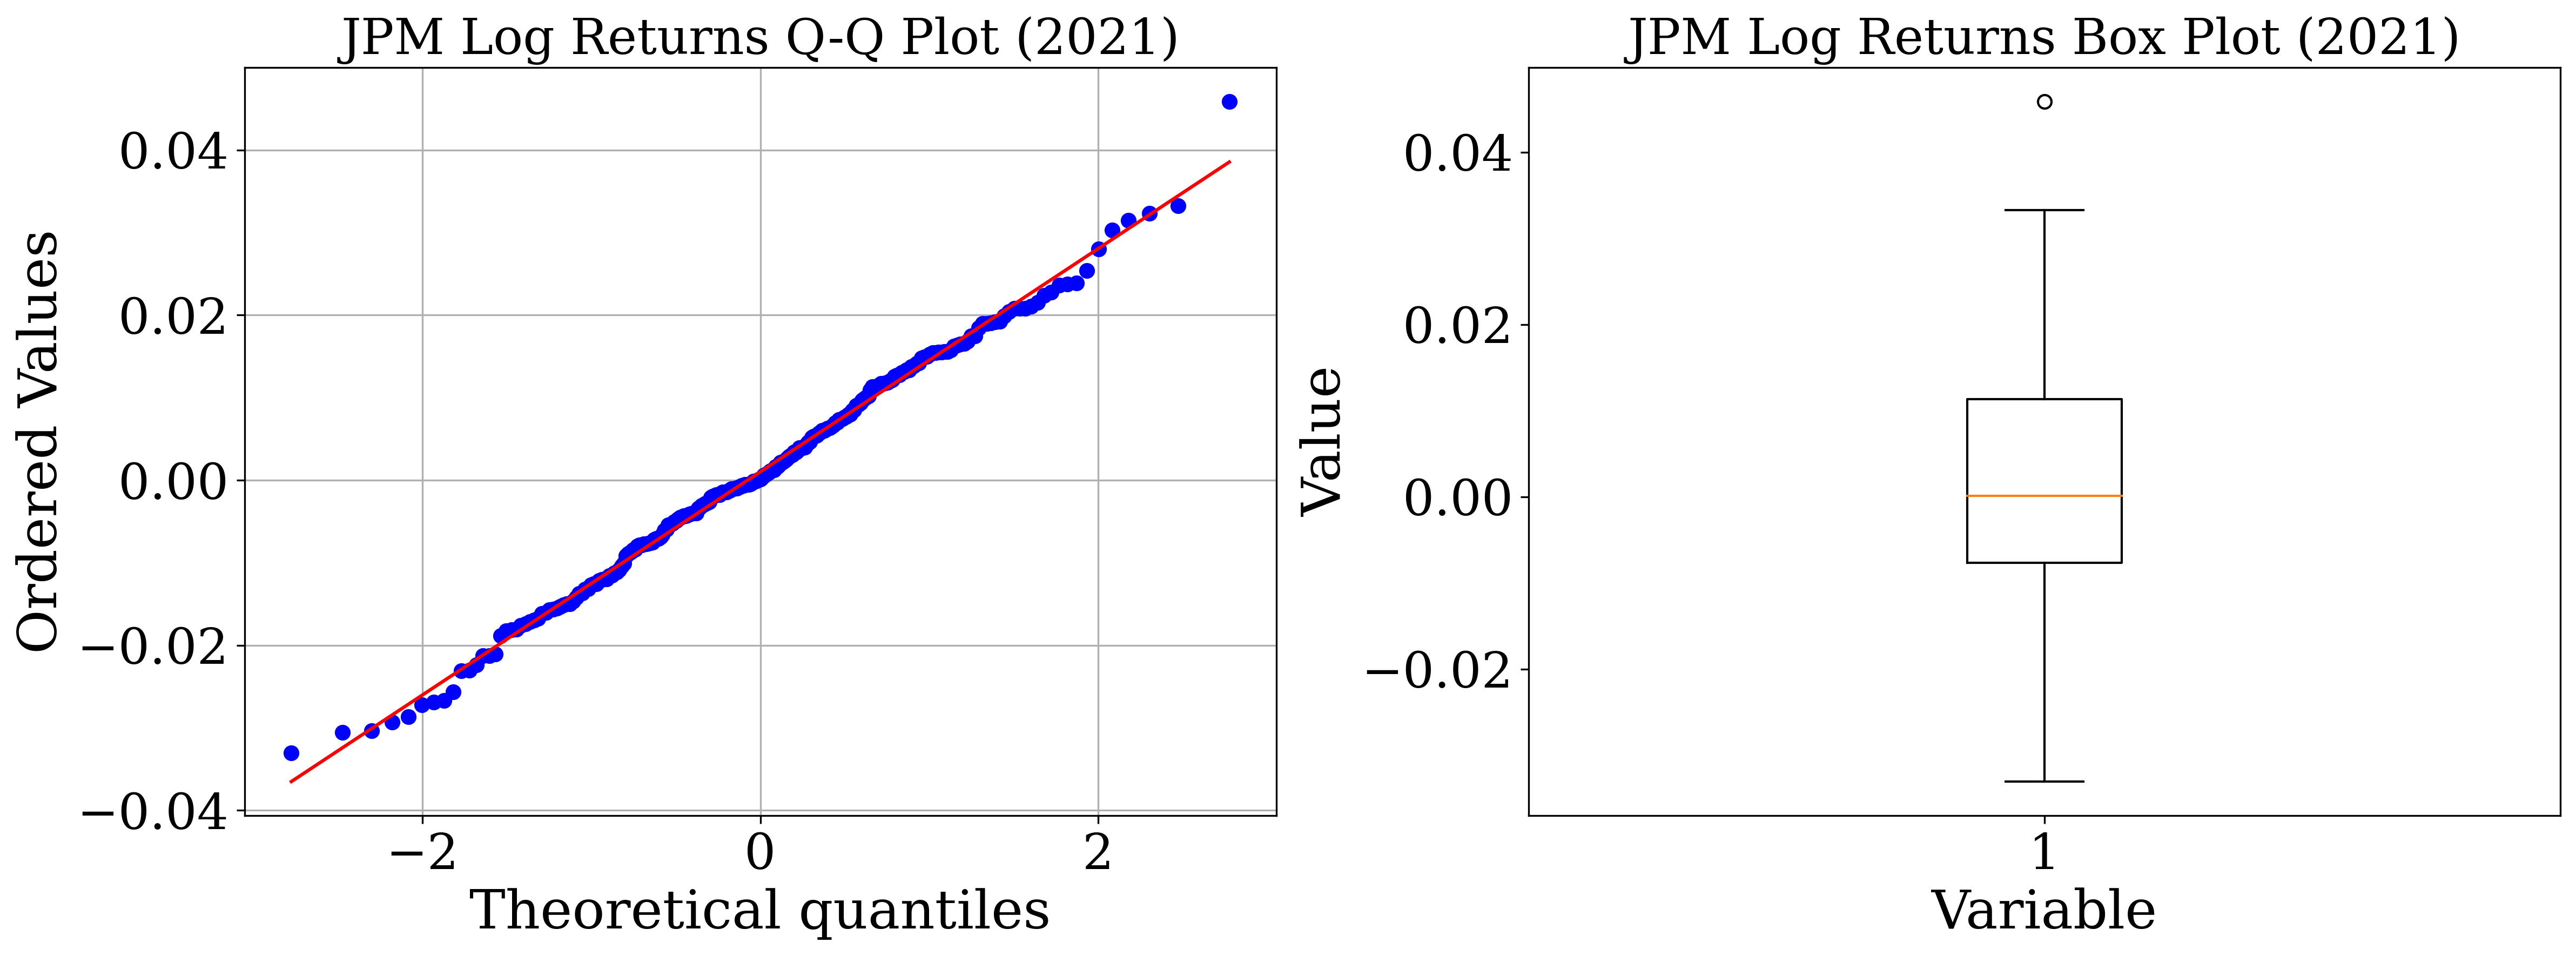

In [8]:
fig, axes = plt.subplots(1,2,figsize=(16, 6),dpi=300)

stats.probplot(JPMStockLogReturnsCustom, dist="norm", plot=axes[0])
axes[0].set_title("JPM Log Returns Q-Q Plot (2021)")
axes[0].grid(True)
axes[1].boxplot(JPMStockLogReturnsCustom)
axes[1].set_xlabel("Variable")
axes[1].set_ylabel("Value")
axes[1].set_title("JPM Log Returns Box Plot (2021)")
plt.tight_layout()
plt.show()

### Q-Q  and box plot - log returns of JPMorgan Chase & Co (2021)

In [9]:
pvalue = stats.shapiro(JPMStockLogReturnsCustom)[1]
print("Normality Test Results of JPMorgan Chase & Co stock (Shapiro-Wilk test):")
print(f"p-value = {pvalue}")
if pvalue < 0.05:
    print("Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("No statistically significant evidence against normality.")

Normality Test Results of JPMorgan Chase & Co stock (Shapiro-Wilk test):
p-value = 0.7530741691589355
No statistically significant evidence against normality.


## Conclusion 

This analysis reveals that JPMorgan Chase & Co log returns in 2021 adhered to a normal distribution, as evidenced by the graphical tests (Q-Q and box plots) and confirmed by statistical tests. Unlike the turbulent periods of 2020 (COVID) and 2024–2025 (global conflicts, trade wars), which were dominated by extreme outliers, 2021 stands out as a remarkably stable year for JPMorgan Chase & Co, enabling the log returns to align with normality. This finding contrasts with the broader 10-year dataset, where market disruptions like COVID and geopolitical tensions skewed the distribution with heavy-tailed outliers. This raises a compelling question for future exploration: what market conditions in 2021 fostered this normality, and can they be replicated in other stable periods? These questions are interesting future endeavors. 

# Exploration 2: Removing extremal values from the dataset

What happens if we trim the extreme values from JPM's log returns? We hypothesize that the data might then follow a normal distribution, and we aim to test this. To identify and remove outliers, we'll use the box plot method, which leverages the interquartile range (IQR). The box spans from the first quartile (Q1) to the third quartile (Q3), with a line marking the median. Whiskers stretch from the box to the furthest data points within 1.5 times the IQR, helping us pinpoint and exclude those pesky outliers.

### Plotting the JPM log returns over last 10 years 

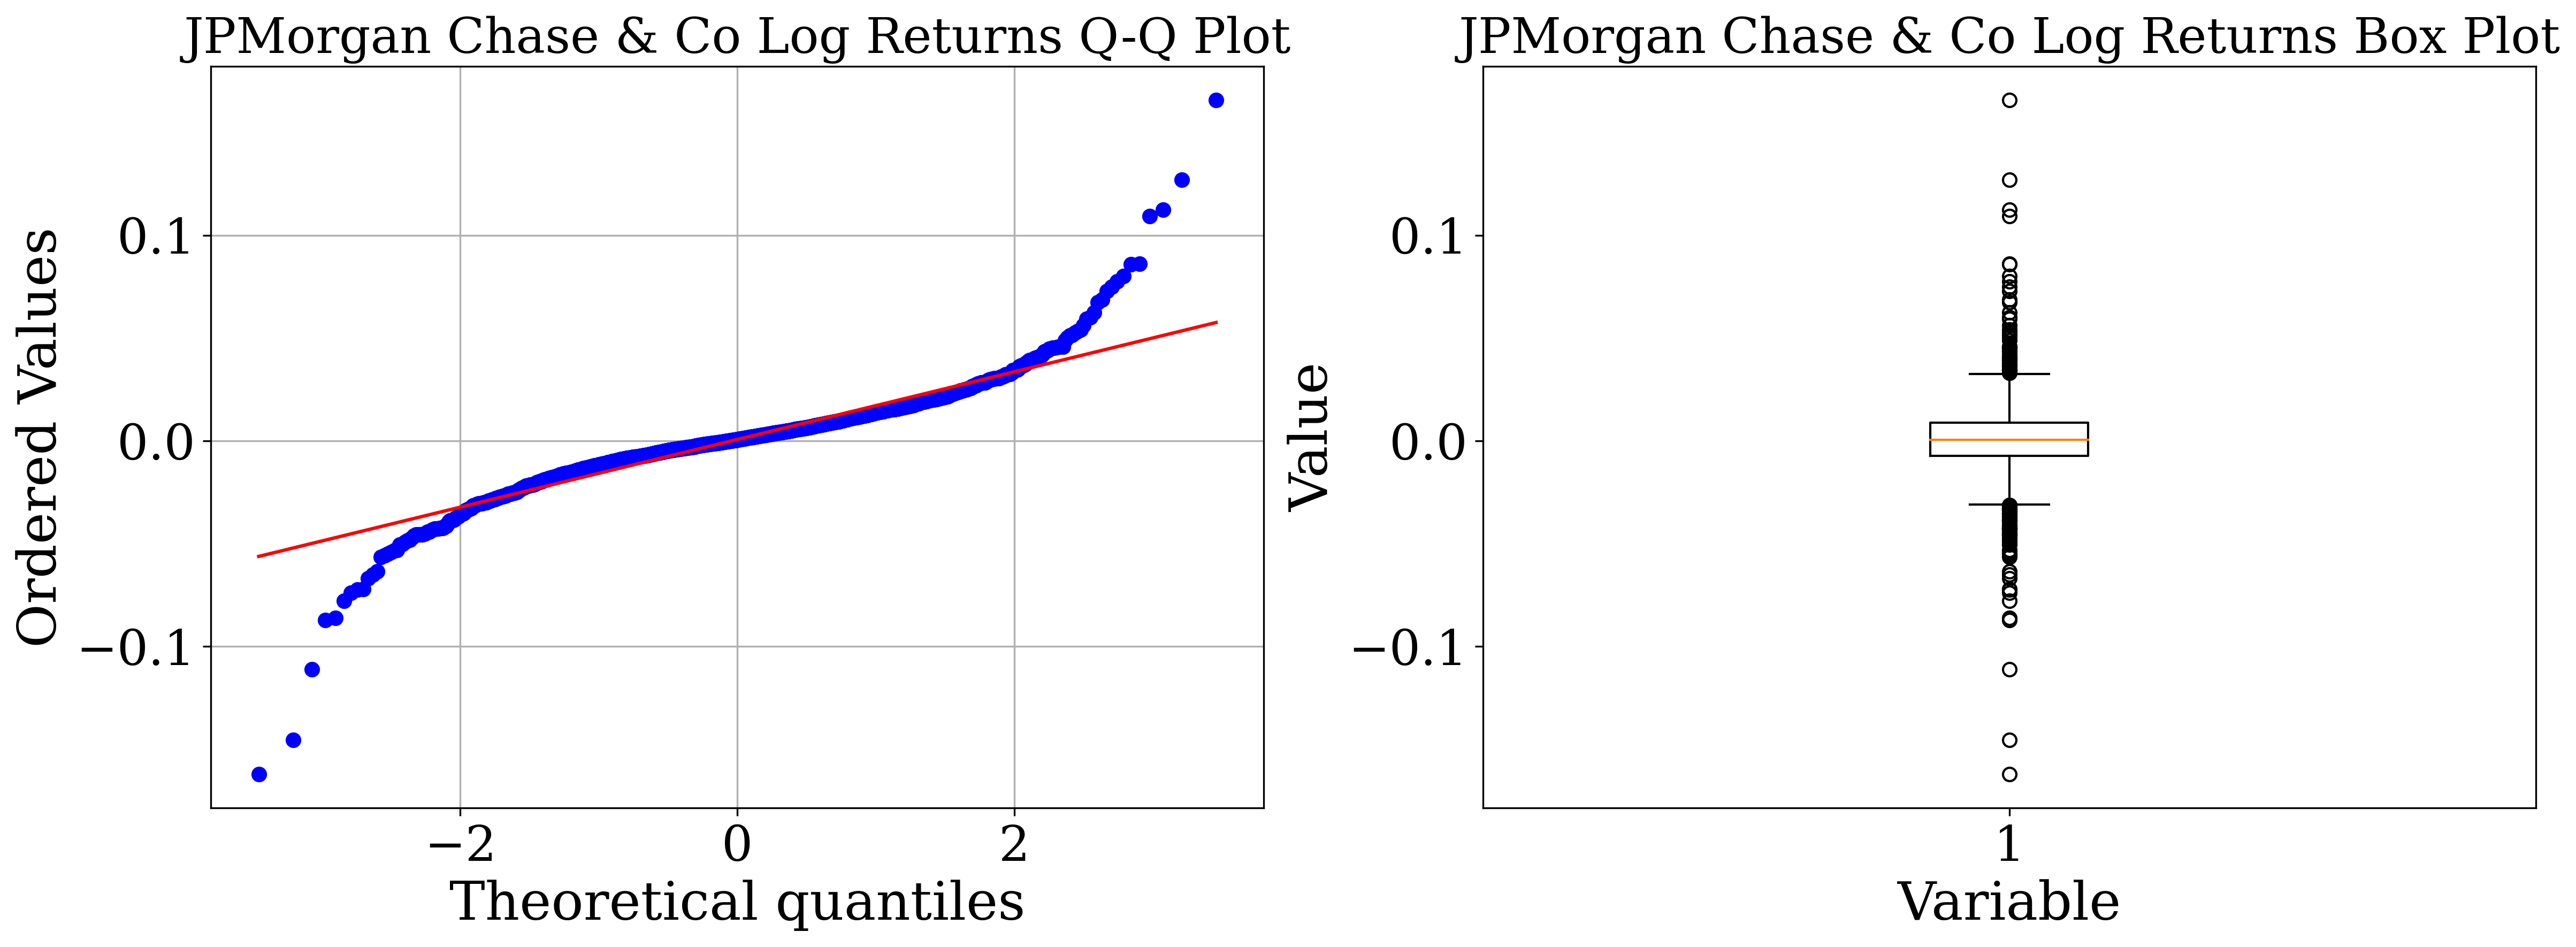

In [10]:
fig, axes = plt.subplots(1,2,figsize=(16, 6),dpi=300)

stats.probplot(JPMStockLogReturns, dist="norm", plot=axes[0])
axes[0].set_title("JPMorgan Chase & Co Log Returns Q-Q Plot")
axes[0].grid(True)
WhiskersBoxPlot = axes[1].boxplot(JPMStockLogReturns)["whiskers"]
axes[1].set_xlabel("Variable")
axes[1].set_ylabel("Value")
axes[1].set_title("JPMorgan Chase & Co Log Returns Box Plot")
plt.tight_layout()
plt.show()

### Extracting the whiskers (threshold) from the box plot

In [11]:
LowerWhisker = WhiskersBoxPlot[0].get_ydata()[1]
UpperWhisker = WhiskersBoxPlot[1].get_ydata()[1]
print(f"The lower and upper threshold for extremal values are {LowerWhisker:.4f} and {UpperWhisker:.4f}")

The lower and upper threshold for extremal values are -0.0310 and 0.0326


### Removing the extremal value from the log returns 

In [12]:
Mask = np.where((JPMStockLogReturns <= UpperWhisker) & (JPMStockLogReturns >= LowerWhisker))
JPMStockLogReturnsTrimmed = JPMStockLogReturns[Mask]

### Plotting the JPM log returns over last 10 years omitting the extremal data

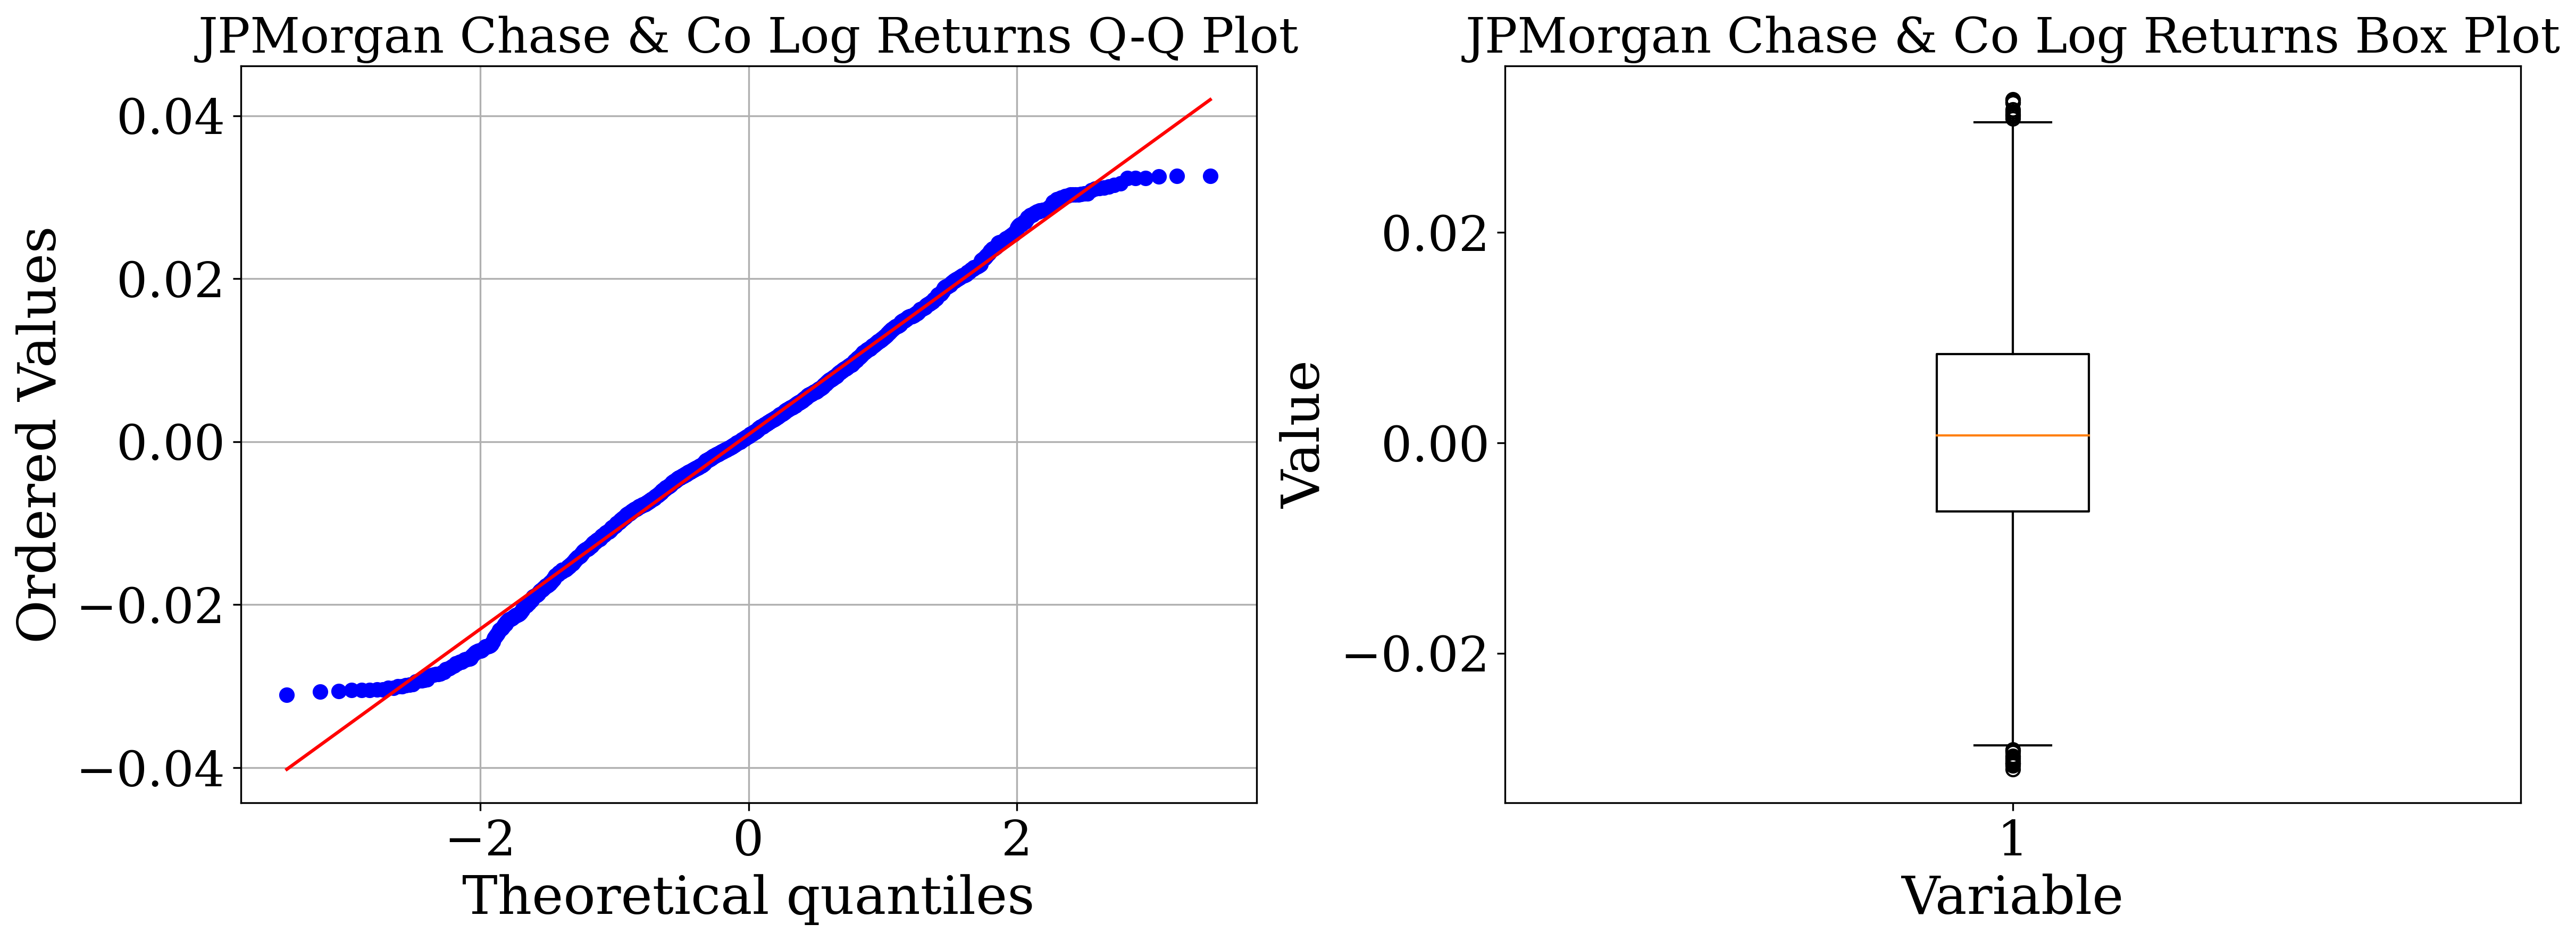

In [13]:
fig, axes = plt.subplots(1,2,figsize=(16, 6),dpi=300)

stats.probplot(JPMStockLogReturnsTrimmed, dist="norm", plot=axes[0])
axes[0].set_title("JPMorgan Chase & Co Log Returns Q-Q Plot")
axes[0].grid(True)
WhiskersBoxPlot = axes[1].boxplot(JPMStockLogReturnsTrimmed)["whiskers"]
axes[1].set_xlabel("Variable")
axes[1].set_ylabel("Value")
axes[1].set_title("JPMorgan Chase & Co Log Returns Box Plot")
plt.tight_layout()
plt.show()

### Shapiro-Wilk test - Log returns of JPMorgan Chase & Co (Omitting the extremal values)

In [14]:
pvalue = stats.shapiro(JPMStockLogReturnsTrimmed)[1]
print("Normality Test Results of JPMorgan Chase & Co stock (Shapiro-Wilk test):")
print(f"p-value = {pvalue}")
if pvalue < 0.05:
    print("Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("No statistically significant evidence against normality.")

Normality Test Results of JPMorgan Chase & Co stock (Shapiro-Wilk test):
p-value = 7.01930446211918e-07
Statistically significant evidence that the data is NOT normally distributed.


Interesting results! Even after omitting the extreme values, JPM's log returns still refuse to conform to a normal distribution. This reveals a critical insight: the normality hypothesis does not just crumble under extreme market events—it falters even in calmer waters. We must critically analyze into factors like distribution skewness and question the assumption that daily log returns are independent and uncorrelated. While assuming normality simplifies the math, it strays far from reality, urging us to rethink our models to mimick the true stock behavior.

Let us quickly check if this also holds true for market in general by analyzing the S&P 500. 

In [15]:
EndDate = dt.datetime.today()
StartDate = EndDate - pd.DateOffset(years=10)

SPYStockData = yf.download('SPY', start = StartDate, end = EndDate)["Close"]
SPYStockReturns = SPYStockData/SPYStockData.shift(1)
SPYStockLogReturns = np.log(SPYStockReturns.dropna())['SPY'].values

WhiskersBoxPlotSPY = axes[1].boxplot(SPYStockLogReturns)["whiskers"]
LowerWhiskerSPY = WhiskersBoxPlotSPY[0].get_ydata()[1]
UpperWhiskerSPY = WhiskersBoxPlotSPY[1].get_ydata()[1]

Mask = np.where((SPYStockLogReturns <= UpperWhisker) & (SPYStockLogReturns >= LowerWhisker))
SPYStockLogReturnsTrimmed = SPYStockLogReturns[Mask]

/var/folders/nn/r9r3k78j2q12py3xmz4vtgzc0000gn/T/ipykernel_45609/3343704327.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SPYStockData = yf.download('SPY', start = StartDate, end = EndDate)["Close"]
[*********************100%***********************]  1 of 1 completed


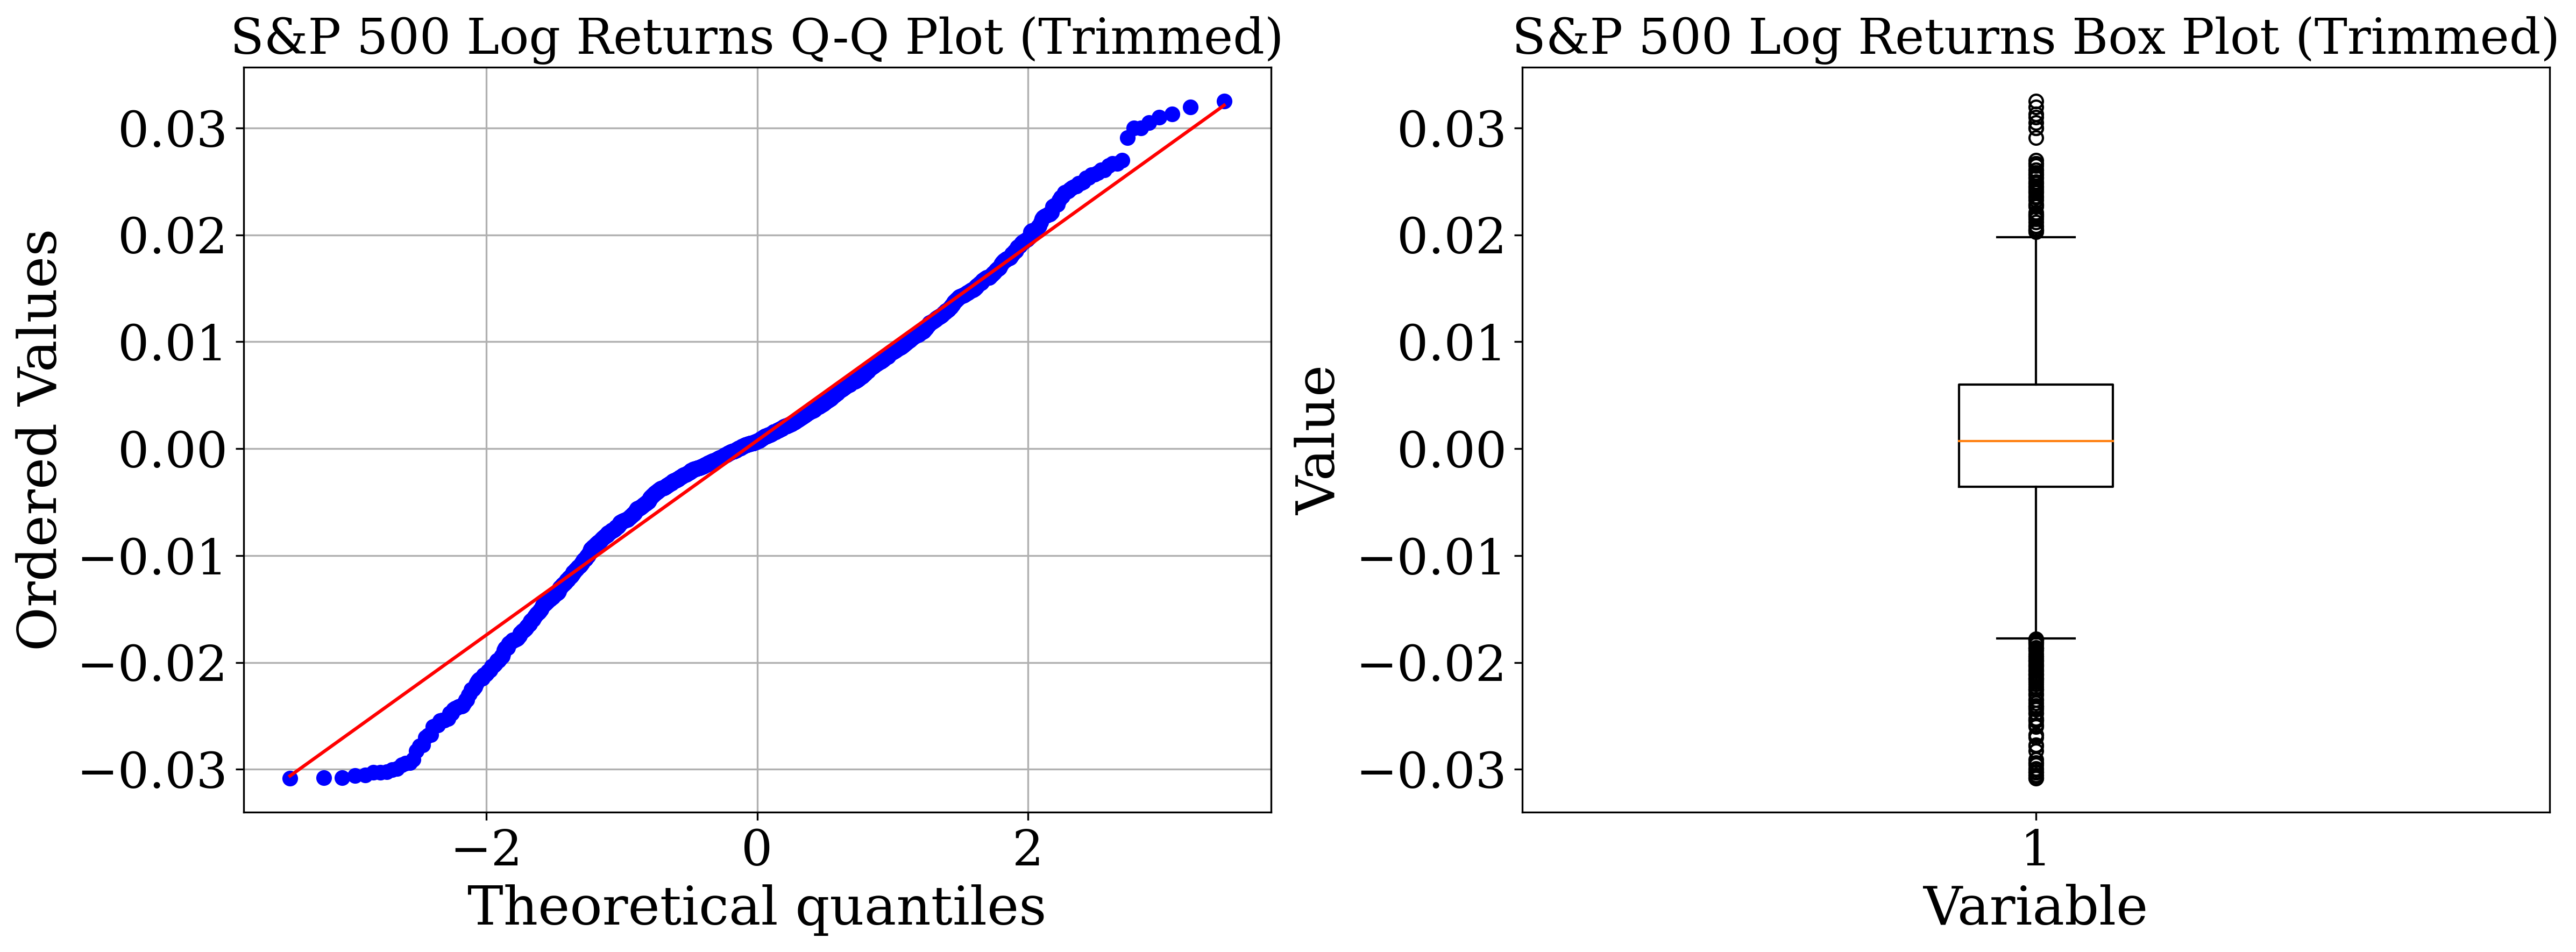

Normality Test Results of JPMorgan Chase & Co stock (Shapiro-Wilk test) with trimmed data:
p-value = 7.01930446211918e-07
Statistically significant evidence that the data is NOT normally distributed.


In [16]:
fig, axes = plt.subplots(1,2,figsize=(16, 6),dpi=300)

stats.probplot(SPYStockLogReturnsTrimmed, dist="norm", plot=axes[0])
axes[0].set_title("S&P 500 Log Returns Q-Q Plot (Trimmed)")
axes[0].grid(True)
WhiskersBoxPlot = axes[1].boxplot(SPYStockLogReturnsTrimmed)["whiskers"]
axes[1].set_xlabel("Variable")
axes[1].set_ylabel("Value")
axes[1].set_title("S&P 500 Log Returns Box Plot (Trimmed)")
plt.tight_layout()
plt.show()

pvalue = stats.shapiro(JPMStockLogReturnsTrimmed)[1]
print("Normality Test Results of JPMorgan Chase & Co stock (Shapiro-Wilk test) with trimmed data:")
print(f"p-value = {pvalue}")
if pvalue < 0.05:
    print("Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("No statistically significant evidence against normality.")

The S&P 500 mirrors our findings: normality in log returns is elusive. A more systematic study could explore shorter or longer timeframes beyond the 10-year window or experiment with alternative methods to filter out extreme events. Yet, the normality assumption remains on shaky ground, leaving doubt on its reliability for modeling market behavior. 

# Exploration 3: Testing a custom portfolio for normality

In this exploration, let us test whether our custom portfolio involving a low-risk and high-risk portfolio has significant periods of time with evidence of normally distributed log returns. Let us gather our portoflio below:

### Load our portfolio data

In [17]:
import json

with open("./LowRiskPortfolio.json", "r") as f:
    LowRiskPortfolio = json.load(f)
with open("./HighRiskPortfolio.json", "r") as f:
    HighRiskPortfolio = json.load(f)
    
LowRiskPortfolioTickers = list(LowRiskPortfolio.keys())
LowRiskPortfolioWeights = list(LowRiskPortfolio.values())
HighRiskPortfolioTickers = list(HighRiskPortfolio.keys())
HighRiskPortfolioWeights = list(HighRiskPortfolio.values())

### Function to compute the log returns of our portfolio

In [18]:
def ComputeLogReturnsPortfolio(PortfolioTickers,PortfolioWeights,StartDate,EndDate):
    """
    Info: Downloads the stock data and computes the log returns of a given portfolio tickers and weights
    
    Params:
        - PortfolioTickers (list of str)  : List of ticker variables of assets in the portfolio
        - PortolioWeights (list of float) : List of weights in the portfolio
        - StartDate (datetime)            : Start date to download data
        - EndDate (datetime)              : End date to download data
    """
    PortfolioData = yf.download(PortfolioTickers, start = StartDate, end = EndDate, interval = "1d")['Close']
    WeightedReturnsPortfolio = PortfolioData.mul(PortfolioWeights,axis=1).sum(axis=1)
    PortfolioReturns = WeightedReturnsPortfolio/WeightedReturnsPortfolio.shift(1)
    PortfolioLogReturns = np.log(PortfolioReturns.dropna().to_numpy())
    DateRangePortfolio = PortfolioReturns.dropna().index
    
    return WeightedReturnsPortfolio, PortfolioLogReturns, DateRangePortfolio

### Download stock data and compute the daily returns of our portfolio over last 4 years

In [19]:
EndDate = dt.datetime.today()
StartDate = EndDate - pd.DateOffset(years=4)

HRPData,HRPLogRet,DateRange = ComputeLogReturnsPortfolio(HighRiskPortfolioTickers, \
                                                        HighRiskPortfolioWeights,StartDate,EndDate)
LRPData,LRPLogRet,DateRange = ComputeLogReturnsPortfolio(LowRiskPortfolioTickers, \
                                                        LowRiskPortfolioWeights,StartDate,EndDate)

/var/folders/nn/r9r3k78j2q12py3xmz4vtgzc0000gn/T/ipykernel_45609/3884006028.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  PortfolioData = yf.download(PortfolioTickers, start = StartDate, end = EndDate, interval = "1d")['Close']
[*********************100%***********************]  25 of 25 completed
/var/folders/nn/r9r3k78j2q12py3xmz4vtgzc0000gn/T/ipykernel_45609/3884006028.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  PortfolioData = yf.download(PortfolioTickers, start = StartDate, end = EndDate, interval = "1d")['Close']
[*********************100%***********************]  25 of 25 completed


### Plot our low-risk and high-risk portfolio value

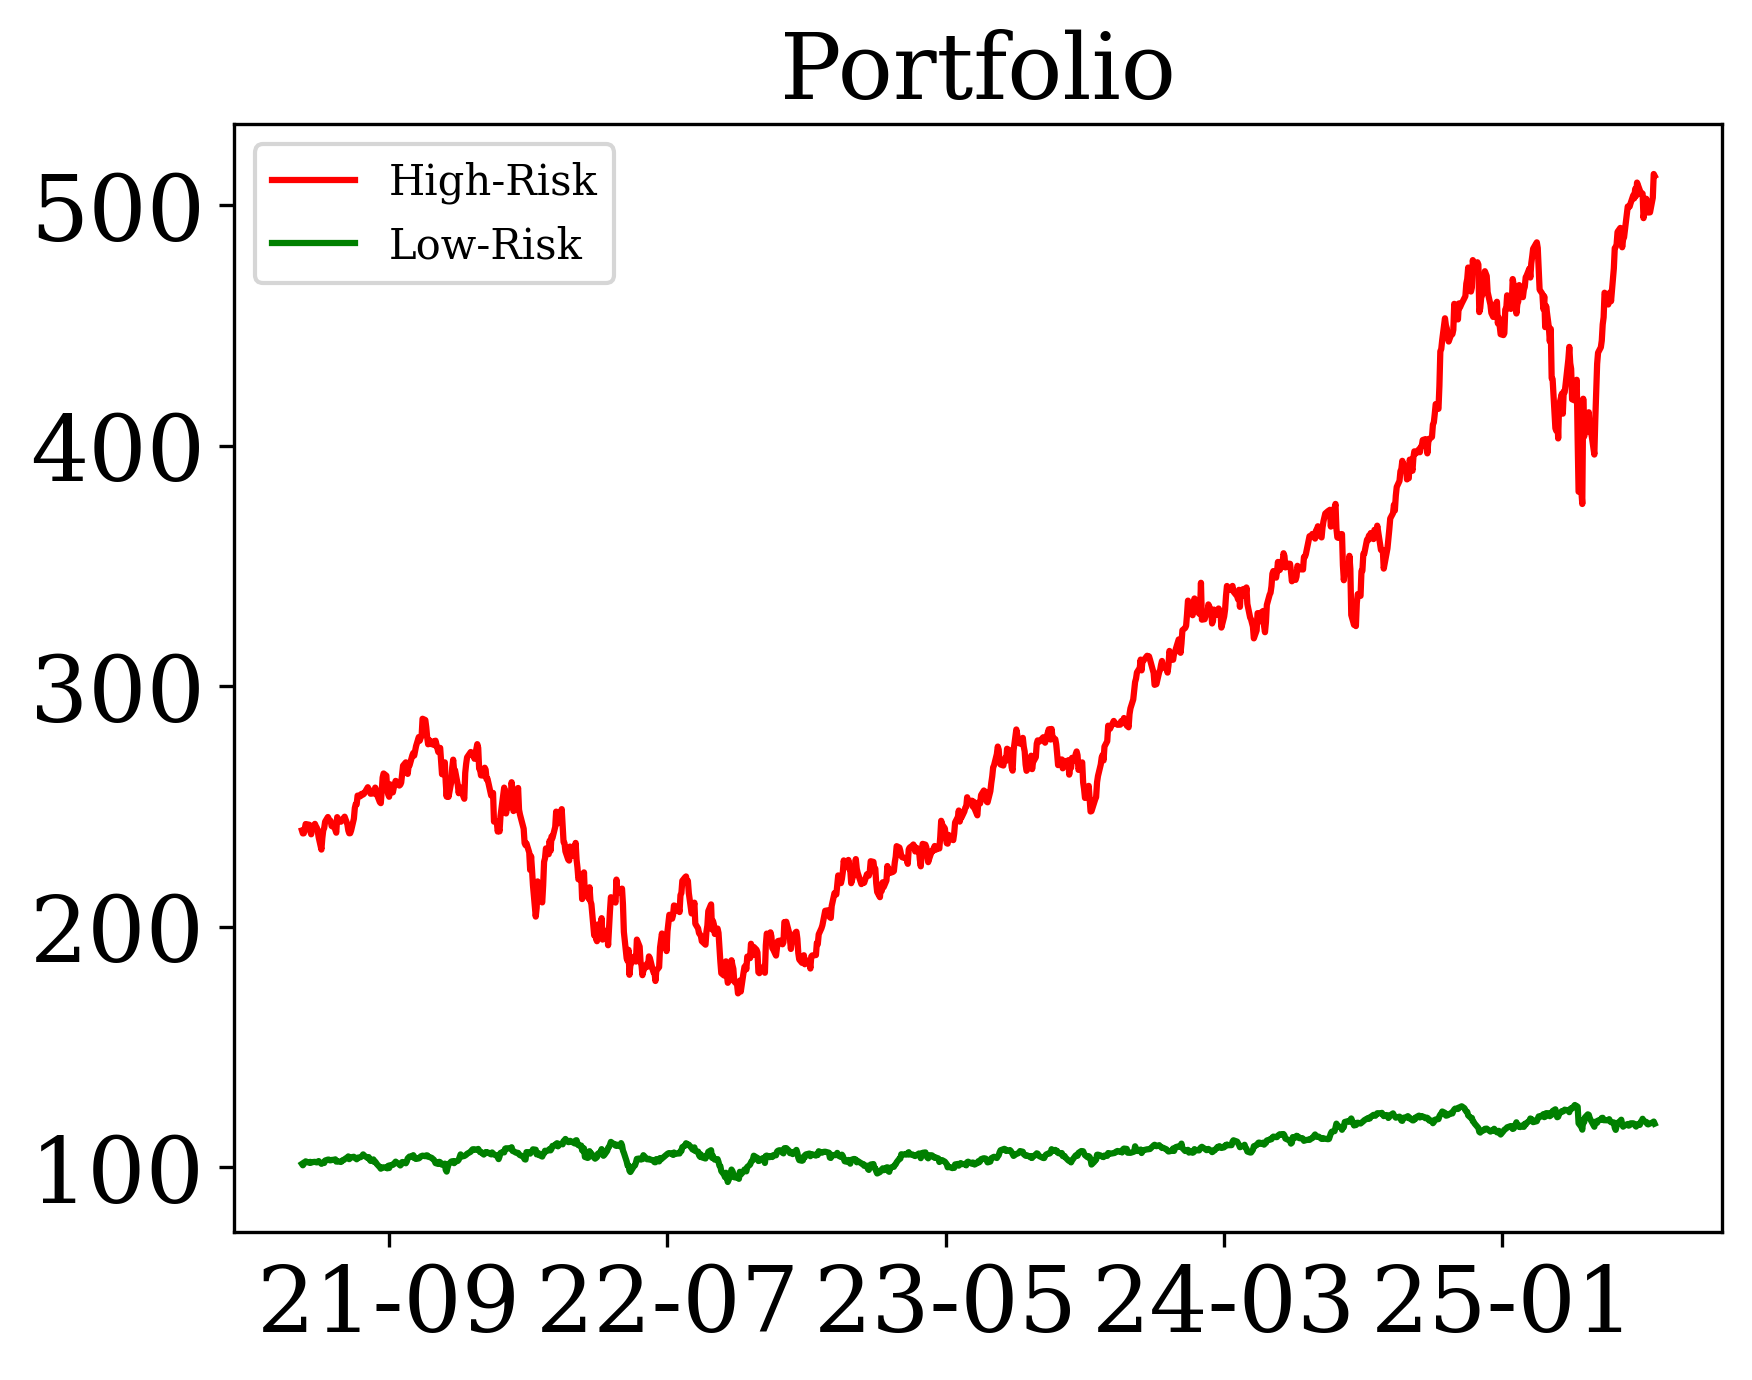

In [20]:
fig,ax = plt.subplots()
ax.plot(HRPData,color='r',label="High-Risk")
ax.plot(LRPData,color='g',label="Low-Risk")
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax.set_title("Portfolio")
plt.legend()
plt.show()

### Testing for normality

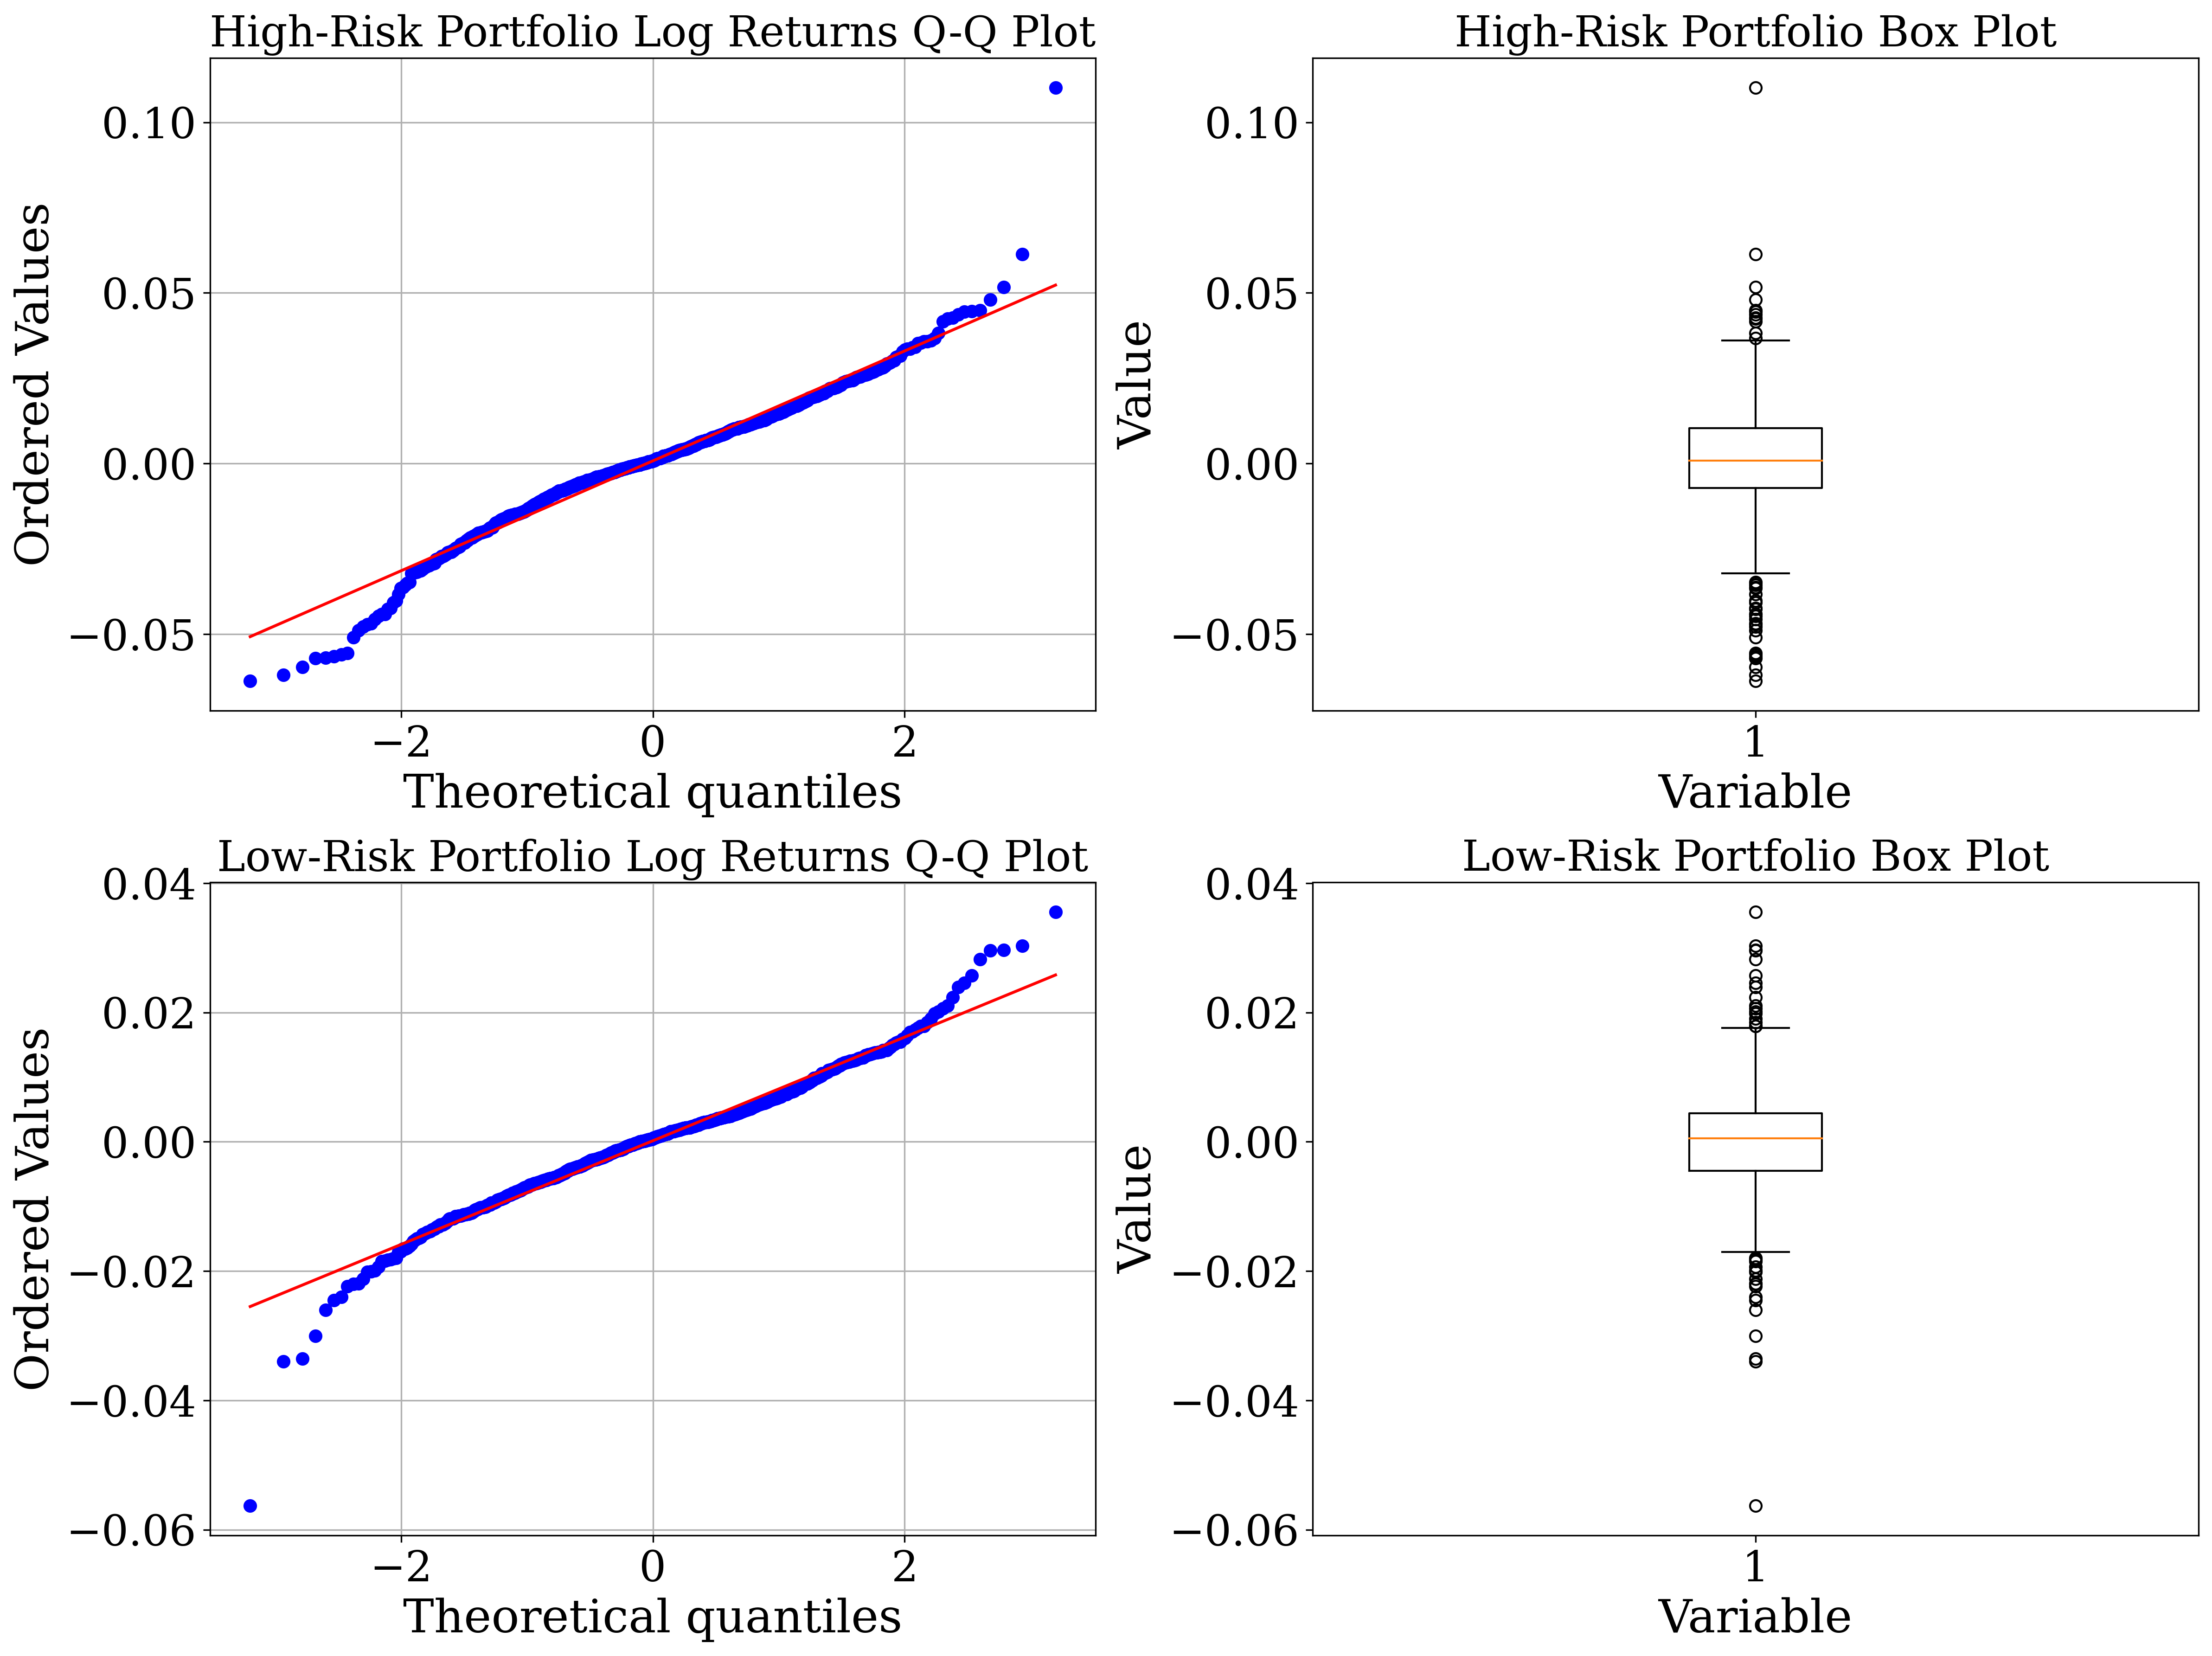

Normality Test Results of High-Risk Portfolio (Shapiro-Wilk test):
p-value = 7.015056988941967e-15
Statistically significant evidence that the portfolio is NOT normally distributed.
Normality Test Results of Low-Risk Portfolio (Shapiro-Wilk test):
p-value = 3.2774825198646565e-14
Statistically significant evidence that the portfolio is NOT normally distributed.


In [21]:
fig, axes = plt.subplots(2,2,figsize=(16, 12),dpi=300)

stats.probplot(HRPLogRet, dist="norm", plot=axes[0,0])
axes[0,0].set_title("High-Risk Portfolio Log Returns Q-Q Plot")
axes[0,0].grid(True)
WhiskersBoxPlotHR = axes[0,1].boxplot(HRPLogRet)["whiskers"]
axes[0,1].set_xlabel("Variable")
axes[0,1].set_ylabel("Value")
axes[0,1].set_title("High-Risk Portfolio Box Plot")

stats.probplot(LRPLogRet, dist="norm", plot=axes[1,0])
axes[1,0].set_title("Low-Risk Portfolio Log Returns Q-Q Plot")
axes[1,0].grid(True)
WhiskersBoxPlotLR = axes[1,1].boxplot(LRPLogRet)["whiskers"]
axes[1,1].set_xlabel("Variable")
axes[1,1].set_ylabel("Value")
axes[1,1].set_title("Low-Risk Portfolio Box Plot")
plt.tight_layout()
plt.show()

pvalueHR = stats.shapiro(HRPLogRet)[1]
pvalueLR = stats.shapiro(LRPLogRet)[1]
print("==================================================================")
print("Normality Test Results of High-Risk Portfolio (Shapiro-Wilk test):")
print("==================================================================")
print(f"p-value = {pvalueHR}")
if pvalueHR < 0.05:
    print("Statistically significant evidence that the portfolio is NOT normally distributed.")
else:
    print("No statistically significant evidence against normality.")
print("==================================================================")
print("Normality Test Results of Low-Risk Portfolio (Shapiro-Wilk test):")
print("==================================================================")
print(f"p-value = {pvalueLR}")
if pvalueLR < 0.05:
    print("Statistically significant evidence that the portfolio is NOT normally distributed.")
else:
    print("No statistically significant evidence against normality.")

For the period of past 4 years, we find statistical significance that both our high-risk and low-risk portfolio's log return refuse to conform to normal distribution. We shall dissect our log returns and check if there is any time-period over which we find some evidence for normality. 

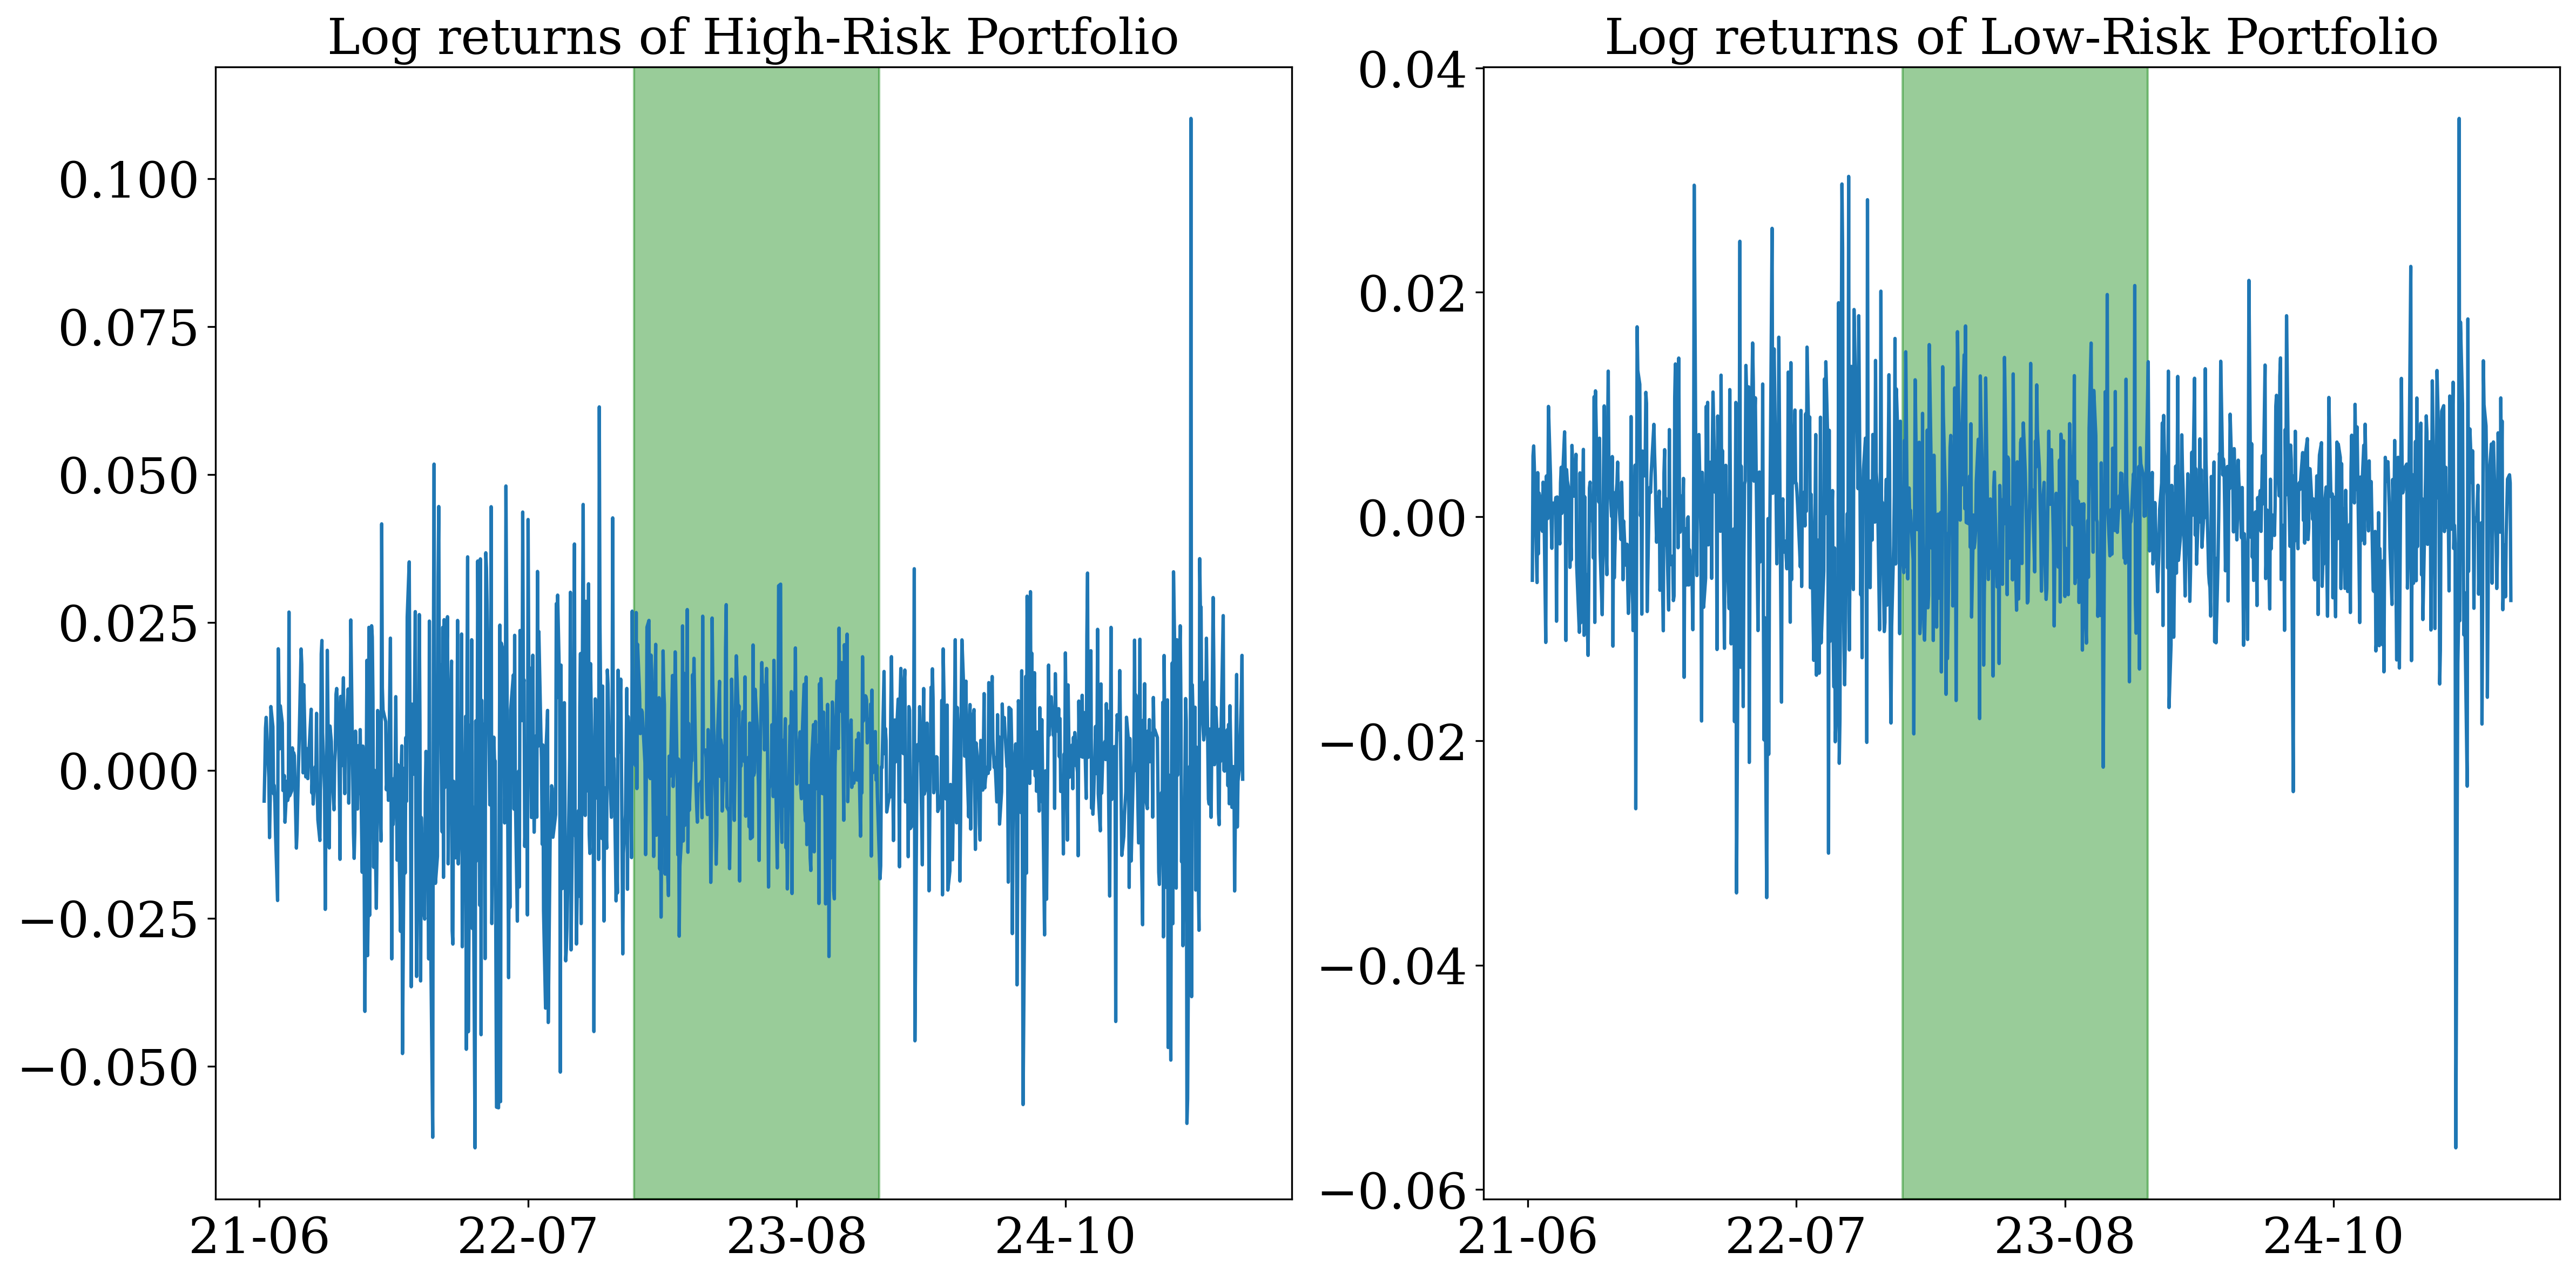

In [22]:
fig,axes = plt.subplots(1,2, figsize=(16,8),dpi=300)
axes[0].plot(DateRange,HRPLogRet)
axes[1].plot(DateRange,LRPLogRet)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(5)) 
axes[1].xaxis.set_major_locator(plt.MaxNLocator(5)) 
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
axes[0].set_title("Log returns of High-Risk Portfolio")
axes[1].set_title("Log returns of Low-Risk Portfolio")
StartDate = dt.datetime(2023,1,1)
EndDate = dt.datetime(2024,1,1)
axes[0].axvspan(StartDate, EndDate, alpha=0.4, color='green')
axes[1].axvspan(StartDate, EndDate, alpha=0.4, color='green')
plt.tight_layout()
plt.show()

The 2023 period stands out as a calm window with minimal outliers and a seemingly symmetrical distribution. Let’s put it to the test and check if the log returns follow a normal distribution during this time.

In [23]:
StartDate = dt.datetime(2023,1,1)
EndDate = dt.datetime(2024,1,1)
HRPData2023,HRPLogRet2023,DateRange2023 = ComputeLogReturnsPortfolio(HighRiskPortfolioTickers, \
                                                        HighRiskPortfolioWeights,StartDate,EndDate)
LRPData2023,LRPLogRet2023,DateRange2023 = ComputeLogReturnsPortfolio(LowRiskPortfolioTickers, \
                                                        LowRiskPortfolioWeights,StartDate,EndDate)

/var/folders/nn/r9r3k78j2q12py3xmz4vtgzc0000gn/T/ipykernel_45609/3884006028.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  PortfolioData = yf.download(PortfolioTickers, start = StartDate, end = EndDate, interval = "1d")['Close']
[*********************100%***********************]  25 of 25 completed
/var/folders/nn/r9r3k78j2q12py3xmz4vtgzc0000gn/T/ipykernel_45609/3884006028.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  PortfolioData = yf.download(PortfolioTickers, start = StartDate, end = EndDate, interval = "1d")['Close']
[*********************100%***********************]  25 of 25 completed


### Testing for normality for 2023 log returns 

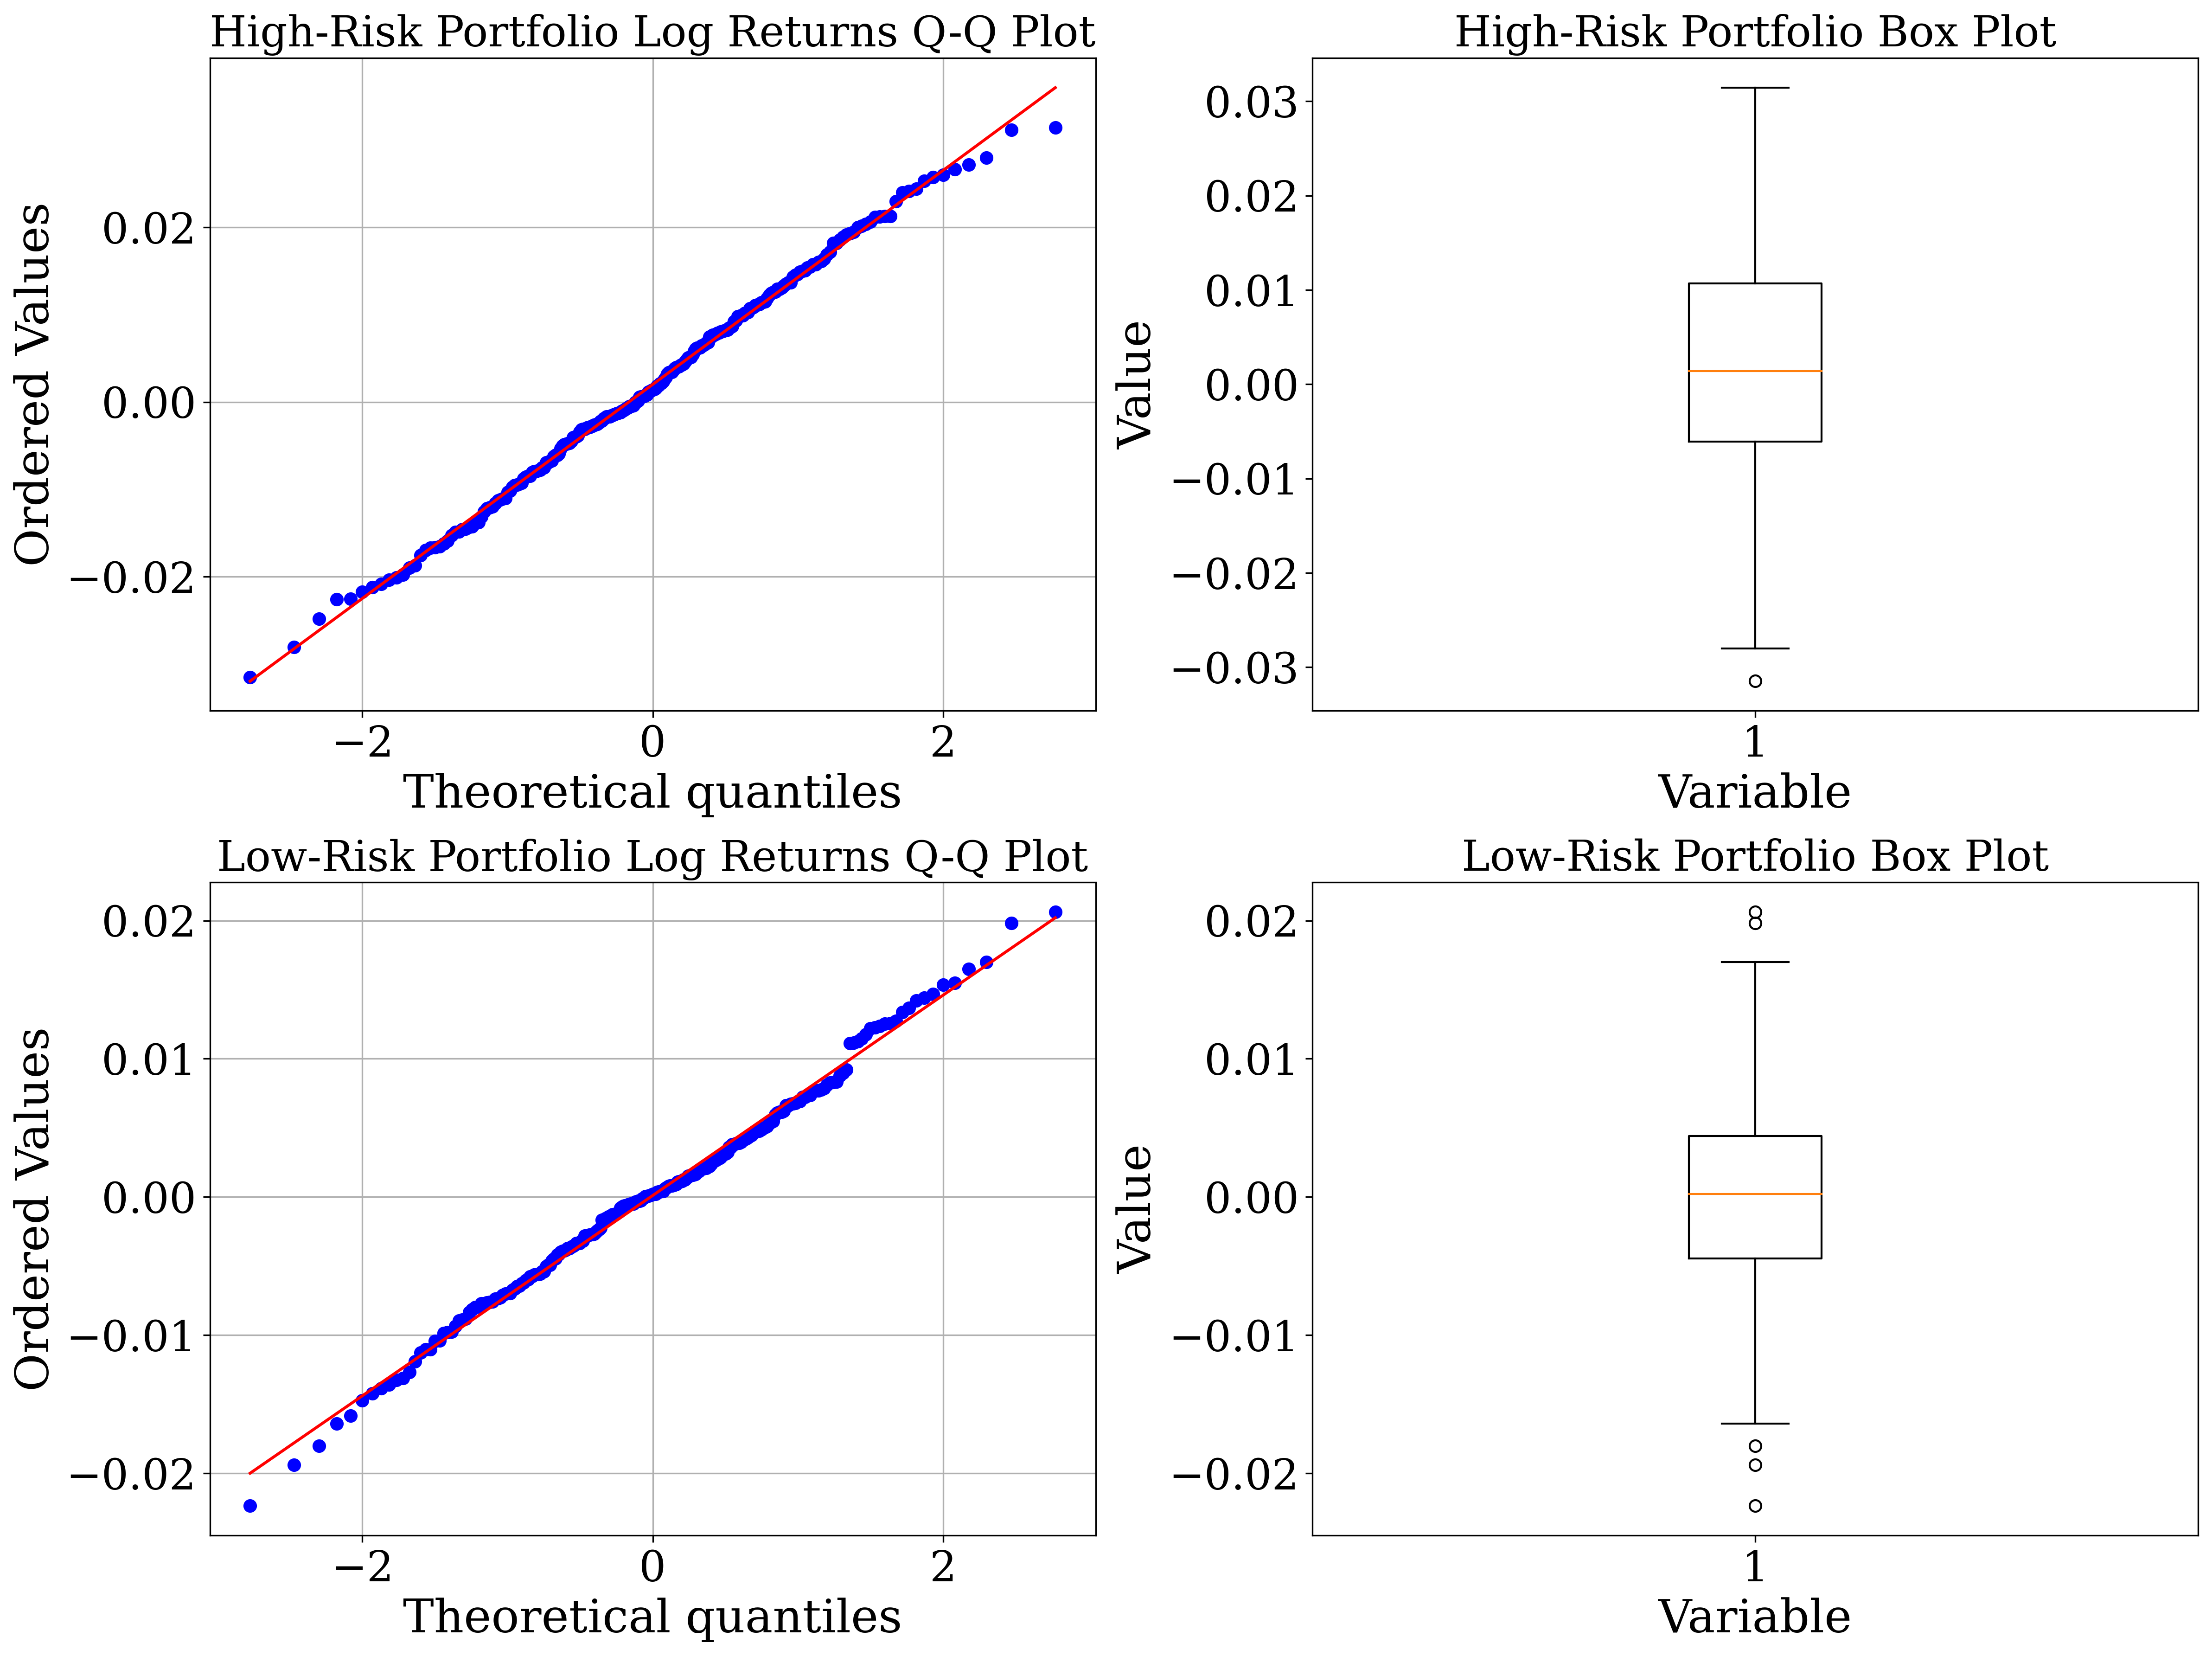

Normality Test Results of High-Risk Portfolio (2023) (Shapiro-Wilk test) :
p-value = 0.8482862710952759
No statistically significant evidence against normality.
Normality Test Results of Low-Risk Portfolio (2023) (Shapiro-Wilk test) :
p-value = 0.5459806323051453
No statistically significant evidence against normality.


In [24]:
fig, axes = plt.subplots(2,2,figsize=(16, 12),dpi=300)

stats.probplot(HRPLogRet2023, dist="norm", plot=axes[0,0])
axes[0,0].set_title("High-Risk Portfolio Log Returns Q-Q Plot")
axes[0,0].grid(True)
WhiskersBoxPlotHR = axes[0,1].boxplot(HRPLogRet2023)["whiskers"]
axes[0,1].set_xlabel("Variable")
axes[0,1].set_ylabel("Value")
axes[0,1].set_title("High-Risk Portfolio Box Plot")

stats.probplot(LRPLogRet2023, dist="norm", plot=axes[1,0])
axes[1,0].set_title("Low-Risk Portfolio Log Returns Q-Q Plot")
axes[1,0].grid(True)
WhiskersBoxPlotLR = axes[1,1].boxplot(LRPLogRet2023)["whiskers"]
axes[1,1].set_xlabel("Variable")
axes[1,1].set_ylabel("Value")
axes[1,1].set_title("Low-Risk Portfolio Box Plot")
plt.tight_layout()
plt.show()

pvalueHR = stats.shapiro(HRPLogRet2023)[1]
pvalueLR = stats.shapiro(LRPLogRet2023)[1]
print("==================================================================")
print("Normality Test Results of High-Risk Portfolio (2023) (Shapiro-Wilk test) :")
print("==================================================================")
print(f"p-value = {pvalueHR}")
if pvalueHR < 0.05:
    print("Statistically significant evidence that the portfolio is NOT normally distributed.")
else:
    print("No statistically significant evidence against normality.")
print("==================================================================")
print("Normality Test Results of Low-Risk Portfolio (2023) (Shapiro-Wilk test) :")
print("==================================================================")
print(f"p-value = {pvalueLR}")
if pvalueLR < 0.05:
    print("Statistically significant evidence that the portfolio is NOT normally distributed.")
else:
    print("No statistically significant evidence against normality.")

As predicted, the Q-Q plot, box plot, and Shapiro-Wilk test confirm that our portfolio's log returns in 2023 align with a normal distribution!

# Conclusion of Mini-project 2

Mini Project 2 has illuminated the behavior of log returns for various stocks, with a particular focus on JPMorgan Chase & Co. and our broader portfolio. Our analysis reveals a striking contrast: while the 10-year dataset (2016–2025) for JPM is skewed by extreme outliers from turbulent periods like COVID (2020) and global conflicts (2024–2025), specific years tell a different story. Notably, 2021 for JPM and 2023 for our portfolio emerged as islands of stability, where log returns aligned with a normal distribution, as confirmed by Q-Q plots, box plots, and statistical tests like Shapiro-Wilk. These findings highlight that normality in stock returns is not a universal trait but can surface under special market conditions. However, even after trimming extreme values, normality often remained elusive, challenging the assumption that daily log returns are independent and uncorrelated. Factors like skewness and market dynamics further complicate the picture, suggesting that the normality assumption, while mathematically convenient, frequently diverges from reality. This project underscores the importance of contextualizing stock return distributions within specific timeframes and raises compelling questions for future exploration: what conditions foster normality, and how can we refine our models to better capture market behavior? These insights mark a significant step in my understanding of stock return distributions.